# **EDA**

## Objectives

* Describe the data using basic statistics
* Use visualisations to explore the distribution, skew and kurtosis of numerical varaibles
* Use bar charts to explore the distribution of categorical variables
* Compare median clearance time of categorical variables 
* Compute statistical significance between variables of interest
* Use a correlation matrix to explore relationships 

## Inputs

* The dataset, "US_Accidents_For_EDA.csv", saved locally in "Data/EDA"

## Outputs

* The dataset, "US_Accidents_For_ML.csv", saved locally in "Data/ML" 

## Summary of Steps

* Load the dataset
* Describe numerical variables using descriptive statistics
* Plot histogram and boxplot of numerical variables, perform normality test
* Yeo Johnson trnasformation of "Clearance_Time(hr) to aid visualisations
* KDE plots to view distributions of numerical variables by clearance class
* Plot bar charts showing count distribution of categoric variables
* Plot stacked bar charts showing count distribution of categoric variables by clearance class, perform chi-squared test
* Plot stacked bar charts showing count distribution of boolean variables by clearance class, perform chi-squared test
* Plot box chart of "CT_Transformed" for categorical variables, perform Kruskal-Wallis test
* Plot box chart of "CT_Transformed" for boolean variables, perform Mann-Whitney U test
* Plot scatter chart of "CT_Transformed" against numeric variables
* Plot correlation matrix of both numeic and categorical (including boolean) variables
* Plot scatter plot of "Temperature(F)" against "Wind_Chill(F)"
* Drop "Wind_Chill(F)" and "Clearance_Time(hr) from further analysis
* Save new dataset

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project'

---

## Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest
from feature_engine import transformation as vt
from statsmodels.graphics.gofplots import qqplot
import pingouin as pg
import math
from dython.nominal import associations

---

## Load the Dataset

I will use Pandas to open the csv file.

In [5]:
df = pd.read_csv("Data/EDA/US_Accidents_For_EDA.csv")
pd.set_option("display.max_columns", None)
df.head()

Severity  Start_Lat  Start_Lng  Distance(mi) Timezone  Temperature(F)  \
0         2  32.456486 -93.774536         0.501  Central            78.0   
1         2  36.804693 -76.189728         0.253  Eastern            54.0   
2         2  29.895741 -90.090026         1.154  Pacific            40.0   
3         2  32.456459 -93.779709         0.016  Central            62.0   
4         2  26.966433 -82.255414         0.057  Eastern            84.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0           78.0         62.0         29.61            10.0           CALM   
1           54.0         90.0         30.40             7.0           CALM   
2           33.0         58.0         30.28            10.0              N   
3           62.0         75.0         29.80            10.0            SSE   
4           84.0         69.0         29.99            10.0              E   

   Wind_Speed(mph)  Precipitation(in)  Amenity   Bump  Crossing  Give_Way  \
0              0.0                0.0    False  False     False     False   
1              0.0                0.0    False  False      True     False   
2             10.0                0.0    False  False     False     False   
3              8.0                0.0    False  False     False     False   
4             18.0                0.0    False  False     False     False   

   Junction  No_Exit  Railway  Station   Stop  Traffic_Calming  \
0     False    False    False    False  False            False   
1     False    False    False    False  False            False   
2      True    False    False    False  False            False   
3     False    False    False    False  False            False   
4     False    False    False    False  False            False   

   Traffic_Signal Sunrise_Sunset  Clearance_Time(hr) Clearance_Class  \
0           False          Night           26.205833       Very Long   
1            True          Night           81.274444       Very Long   
2           False            Day         8761.750000       Very Long   
3           False          Night           28.096667       Very Long   
4           False            Day           27.260000       Very Long   

  Weather_Simplified State_Other  Population    County_Other Month  
0               Fair          LA      187540           Caddo   Sep  
1               Fair          VA      459444  Virginia Beach   May  
2             Cloudy          LA      440784       Jefferson   Jan  
3             Cloudy          LA      187540           Caddo   Nov  
4             Cloudy          FL      186824           Other   Sep

As far as I can ascertain, "Severity" is a rating system (impact score) and therefore ordinal categorical, so for the purposes of EDA, I will change its data type to "object". It will be changed back to number at the end of this notebook.

In [6]:
df["Severity"] = df["Severity"].astype("object")
df["Severity"].dtype

dtype('O')

---

## Descriptive Statistics

I am going to look at the descriptive statistics of the continuous numerical variables. This will give: the count (number of values); the mean, a measure of central tendency, and standard deviation, which describes the variation or spread of data from the mean; the minimum and maximum values, together with the quartiles (Q), which describe the spread of the data by tshowing the values at which 25 % (Q1), 50 % (Q2) or 75 % (Q3) of the data falls within. The 50 % quartile is also known as the median and is another measure of central tendency.

In general, when data is normally distributed, the mean and standard deviation are used, while if data is skewed (not normally distributed), median and interquartile range are typically used to describe data.

A normal, or Gaussian distribution is a continuous probability distribution where the area under the curve = 1, and the mean = median = mode (most common value). The mean (peak) is in the center and the spread is symmetrically distributed about the mean. Additionally, 68 % of the data falls within 1 standard deviation of the mean, and 95 % and 99.7 % falls within 2 and 3 standard deviations, respectively.  

A positive skew occurs when the mean is greater than the median, while a negative skew occurs when the mean is less than the median. Skewness is measured relative to a normal distribution, which has a skew of 0. 

Another measure is kurtosis, which describes the 'tailedness' and 'peakedness' of a distribution. A  normal distribution has an absolute kurtosis of 3, but kurtosis is measured relative to the normal distribution, so a kurtosis of less than 0 means lighter tails and a flatter peak compared to normal, while a kurtosis of more than 0 indicates heavier tails and a sharper peak compared to normal.  

Kurtosis also relates to the extent of outliers in the data; when tails are light, there are less outliers compared to a normal distribution, but when tails are heavy, there are more outliers. In normally distributed date, values outside 3 standard deviations can be considered outliers. When data is skewed, the interquartile range (IQR; Q3 - Q1), and those that fall outside the range Q1 - (1.5 * IQR) and Q3 + (1.5 * IQR), are considered outliers. 

While a value may be a statistical outlier, that doesn't mean it is not valid, as extreme values can and will occur. However, whenever possible, extreme values should be investigated further to understand whether an error in measurement or recording occurred.   

In [7]:
df.describe()

Start_Lat    Start_Lng  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  9960.000000  9960.000000   9960.000000     9960.000000    9960.000000   
mean     35.731321   -95.102106      0.937225       61.287430      60.001466   
std       5.549589    16.939049      2.424480       18.732327      20.949519   
min      25.435661  -124.430507      0.000000      -17.000000     -36.000000   
25%      32.461804  -116.338590      0.008000       49.000000      48.000000   
50%      35.155197   -90.932593      0.181000       63.000000      63.000000   
75%      40.034891   -80.414568      0.882000       75.000000      75.000000   
max      48.999569   -68.732984     65.308000      112.000000     112.000000   

       Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  9960.000000   9960.000000     9960.000000      9960.000000   
mean     64.901004     29.295206        9.053608         7.388765   
std      22.854755      1.274070        2.790325         5.579474   
min       4.000000     20.330000        0.000000         0.000000   
25%      49.000000     29.190000       10.000000         3.000000   
50%      68.000000     29.730000       10.000000         7.000000   
75%      84.000000     29.970000       10.000000        10.000000   
max     100.000000     30.710000       75.000000        51.000000   

       Precipitation(in)  Clearance_Time(hr)    Population  
count        9960.000000         9960.000000  9.960000e+03  
mean            0.005092          239.888811  6.809507e+05  
std             0.036646         1396.189647  1.387282e+06  
min             0.000000            0.091667  3.400000e+01  
25%             0.000000            0.995278  6.105500e+04  
50%             0.000000            3.038056  2.265250e+05  
75%             0.000000           13.474653  6.525220e+05  
max             1.670000        26304.992778  1.001740e+07

For this data:

- Start_Lat and Start_Lng: not continuous numerical in this sense
- Distance(mi): range is 0 - 65.3; the mean (0.94) is more than the median (0.18) and very far apart, and together with the interquartile range (0.008 - 0.8) suggests an extreme positive skew
- Temperature(F): range is -17 - 112; the mean (61.3) is less than the median (63.0) but close, and together with the interquartile range (49 - 75) suggests a small negative skew
- Wind_Chill(F): range is -36 - 112; the mean (60) is less than the median (63.0) but close, and together with the interquartile range (48 - 75) suggests some negative skew
- Humidity(%): range is 4 - 100; the mean (65.0) is less than the median (68.0) but close, and together with the interquartile range (49 - 84) suggests some negative skew
- Pressure(in): range is 20.3 - 30.7; the mean (29.3) is very close to the median (29.7), but the interquartile range (29.2 - 30.0) suggests a negative skew
- Visibility(mi): range is 0 - 75; the mean (9.1) is close to the median (10.0), but the interquartile range (10 - 10) suggests extreme positive skew
- Wind_Speed(mi): range is 0 - 51; the mean (7.4) is close to the median (7.0), but the interqurtile range (3 - 10) suggests a strong positive skew
- Precipitation(in): range is 0 - 1.67; the mean (0.005) is close to the median (0), but the interqurtile range (0 - 0) suggests a strong positive skew 
- Clearance_Time(hr): range is 0.01 - 26305; the mean (240.0) is extremely far from the median (3.0), which together with the interqurtile range (1.0 - 13.5) suggests an extreme positive skew
- Population: range is 34 - 1.0 x 10^7; the mean (6.8 x 10^5) is far from the median (2.3 x 10^5), which together with the interqurtile range (6.1 x 10^4 - 6.5 x 10^5) suggests an extreme positive skew 


---

## Distribution of Numerical Variables 

I will now visualise what is described above using a histogram, which automatically bins the data and plots the frequency of data that falls within the bins. I am also presenting a box plot that shows the interquartile range and whiskers, outside which outliers are shown as circles.

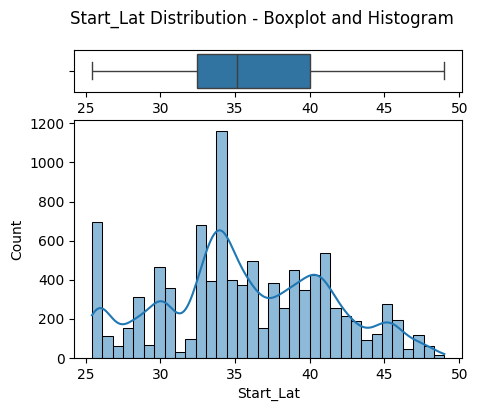

Start_Lat | Non-outlier range: 21.1 to 51.39
Start_Lat | skewness: 0.06 | kurtosis: -0.67




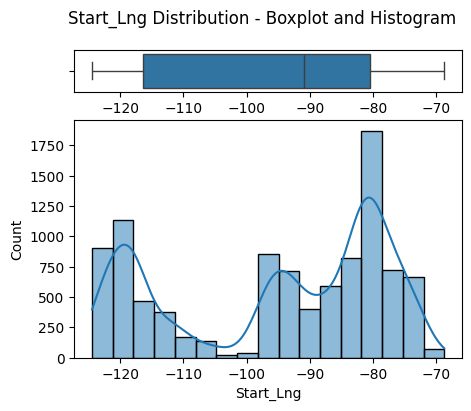

Start_Lng | Non-outlier range: -170.22 to -26.53
Start_Lng | skewness: -0.45 | kurtosis: -1.34




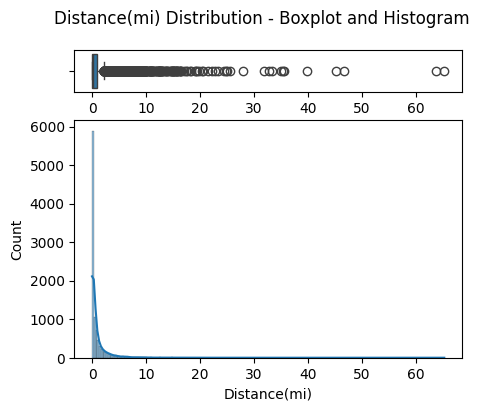

Distance(mi) | Non-outlier range: -1.3 to 2.19
Distance(mi) | skewness: 9.59 | kurtosis: 161.98




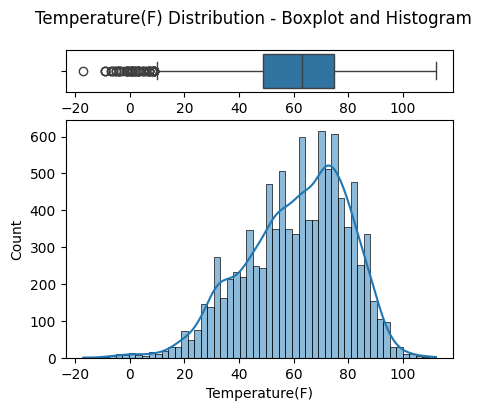

Temperature(F) | Non-outlier range: 10.0 to 114.0
Temperature(F) | skewness: -0.48 | kurtosis: -0.12




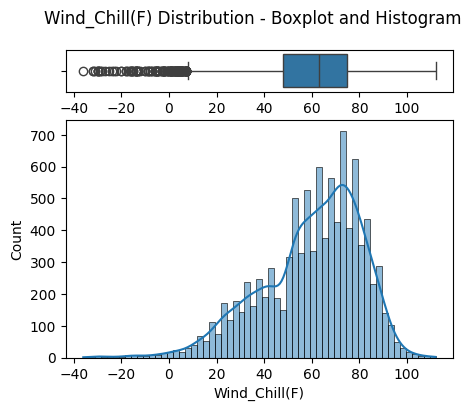

Wind_Chill(F) | Non-outlier range: 7.5 to 115.5
Wind_Chill(F) | skewness: -0.76 | kurtosis: 0.47




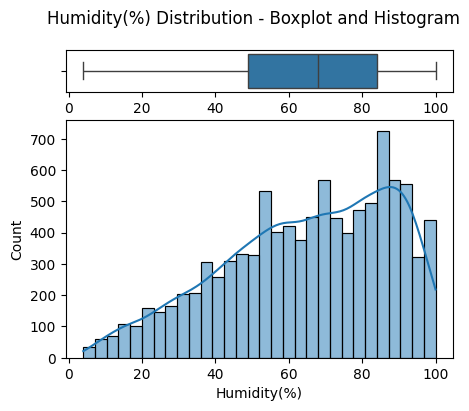

Humidity(%) | Non-outlier range: -3.5 to 136.5
Humidity(%) | skewness: -0.47 | kurtosis: -0.64




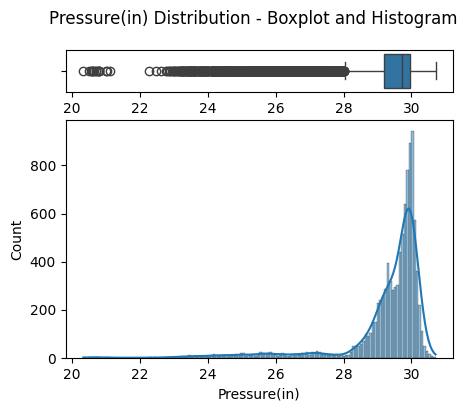

Pressure(in) | Non-outlier range: 28.02 to 31.14
Pressure(in) | skewness: -2.96 | kurtosis: 9.84




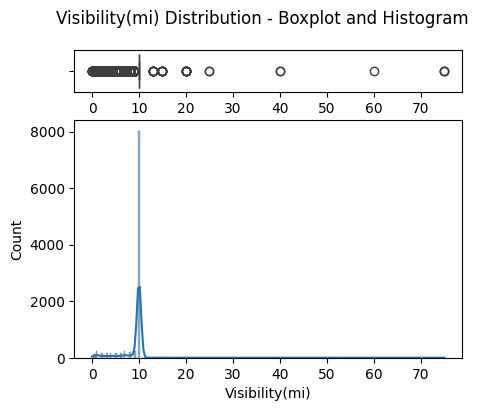

Visibility(mi) | Non-outlier range: 10.0 to 10.0
Visibility(mi) | skewness: 3.35 | kurtosis: 110.14




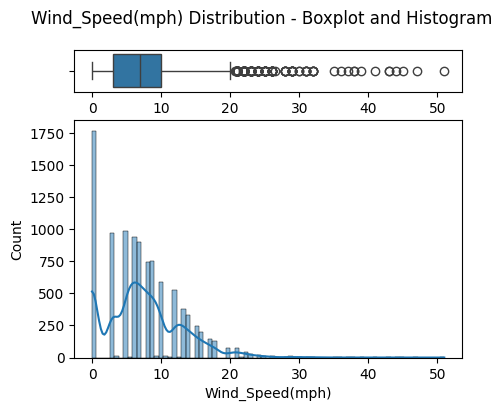

Wind_Speed(mph) | Non-outlier range: -7.5 to 20.5
Wind_Speed(mph) | skewness: 0.94 | kurtosis: 2.24




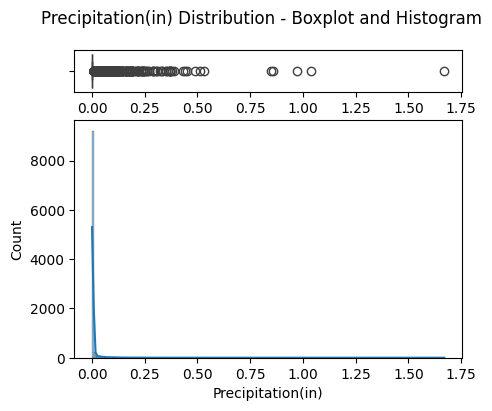

Precipitation(in) | Non-outlier range: 0.0 to 0.0
Precipitation(in) | skewness: 19.88 | kurtosis: 631.72




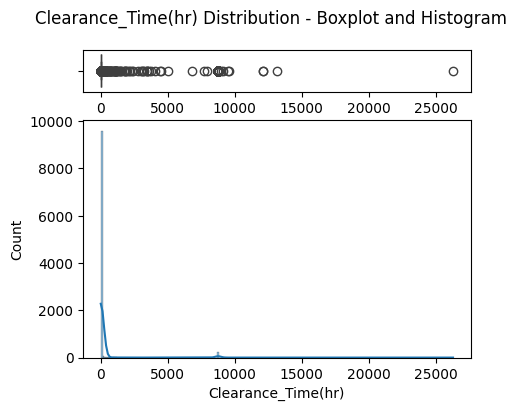

Clearance_Time(hr) | Non-outlier range: -17.72 to 32.19
Clearance_Time(hr) | skewness: 6.4 | kurtosis: 44.79




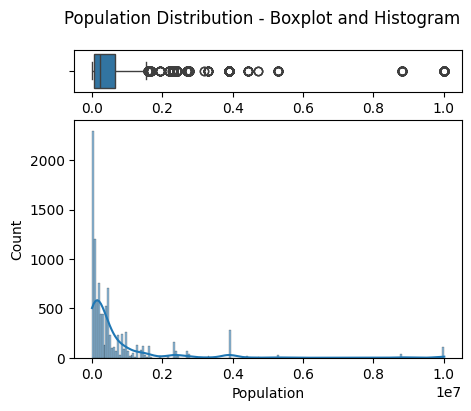

Population | Non-outlier range: -826145.5 to 1539722.5
Population | skewness: 4.55 | kurtosis: 24.73




In [8]:
def plot_histogram_and_boxplot(df):
    for col in df.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(5,4), 
                                 gridspec_kw={"height_ratios": (.15, .85)})
        
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[0])
        
        # Histogram
        sns.histplot(data=df, x=col, kde=True, ax=axes[1])
        
        # Title
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
        plt.show()

        # Outlier range
        IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
        print(
            f"{col} | Non-outlier range: "
            f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
            f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}"
        )

        # Skewness & Kurtosis just for this column
        print(f"{col} | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")
        print("\n")


plot_histogram_and_boxplot(df)

I can see that the histogram for "Clearance_Time(hr) doesn't display the data as expected, because of the distribution. In the section below, I will perform transformations so that the data can be visualised. 

As described above, I can see that, in order of positive skewness from most to least, "Precipitation(in)", "Distance(mi)", "Clearance_Time(hr)", "Population", "Visibility(mi)" and "Wind_Speed(mi)". While, in order of negative skewness from most to least, are "Pressure(in)", "Wind_Chill(F)", "Temperature(F)" and "Humidity(%)". 

In order of most to least kurtosis; with positive values are "Precipitation(in)", "Distance(mi)", "Visibility(mi)", "Clearance_Time(hr)", "Population", "Pressure(in)" and "Wind_Speed(mi)"; and with negative values are "Humidity(%)", "Wind_Chill(F)" and "Temperature(F)". 

I can see that all of the continuous numerical data except "Humidity(%)" have numerous statistical outliers, but are within valid ranges for the measurement being considered. Therefore, I will be keeping all data as they are rather than capping them. If there is time, I would like to run the ML model with capped data to see if it performs better or worse.   

Below, I am conducting the D’Agostino and Pearson’s test to confirm deviation from normality. The null hypothesis is that the data from a normal distribution, while the alternative hypothesis is that it doesn't. If p < 0.05, we reject the null hypothesis and accept the alternative, that the data does not come from a normal distribution. The metric "Statistic" is a measure of the deviation from mornal. The greater the value, the greater the deviation.

In [9]:
df_numeric = df.select_dtypes(include='number')

for col in df_numeric.columns:
    stat, p = normaltest(df_numeric[col].dropna())
    print(f"{col}: Statistic={stat:.3f}, p={p:.3f}")


Start_Lat: Statistic=469.933, p=0.000
Start_Lng: Statistic=415514.274, p=0.000
Distance(mi): Statistic=15337.934, p=0.000
Temperature(F): Statistic=356.665, p=0.000
Wind_Chill(F): Statistic=831.489, p=0.000
Humidity(%): Statistic=722.953, p=0.000
Pressure(in): Statistic=6154.519, p=0.000
Visibility(mi): Statistic=8970.933, p=0.000
Wind_Speed(mph): Statistic=1601.115, p=0.000
Precipitation(in): Statistic=21850.425, p=0.000
Clearance_Time(hr): Statistic=11644.284, p=0.000
Population: Statistic=9141.113, p=0.000


In all cases, I see that the hull hypothesis is rejected; the data doesn't come from a normal distribution.  

ML algorithms, in particular those that are based on distance, correlation or linearity, do not handle skewed data very well. On the other hand, decision tree based model are minimally affected. For this reason, I intend to model the dataset with non-transformated and transformed numeric data to see which performs better.

For this purpose, in the notebook "Number_Feature_Transformations" I investigate which transformation works best for each variable.

---

## Transformation of Clearance Times

I am going to transform "Clearance_Time(hr)" for better visualisations. I have chosen to use the Yeo Johnson transformer here, as it is one of the most flexible general-purpose power transformers that works well across a range of distributions.

I'm going to create a new DataFrame with the transformed values and visualise, to ensure it works well, before adding as a new column on the main DataFrame.

In [10]:
df_filtered = df.filter(["Clearance_Time(hr)"])
df_filtered.head()

Clearance_Time(hr)
0           26.205833
1           81.274444
2         8761.750000
3           28.096667
4           27.260000

In [11]:
# Create and fit transformer
yj = vt.YeoJohnsonTransformer(variables=["Clearance_Time(hr)"])  # or leave empty for all numeric

# Transform the data
df_transformed = yj.fit_transform(df_filtered)

df_transformed.head()

Clearance_Time(hr)
0            1.894681
1            2.157362
2            2.579619
3            1.913922
4            1.905627

The code below will display a histogram of the transformed "Clearance_Time(hr) data, values for skew and kurtosis, as well as a quantile-quantile (QQ) plot, which is a tool for assessing distributions. In this case I am assessing how closely the data resembles a theoretical, normal distribtion (the diagonal straight line).  

*** Clearance_Time(hr) ***


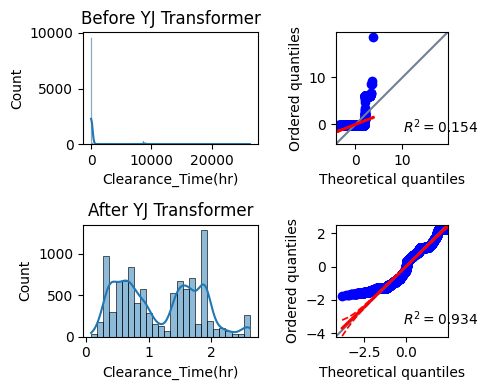

before transformation  | skewness: 6.4 | kurtosis: 44.79
after transformation  | skewness: 0.24 | kurtosis: -1.09




In [12]:
def calculate_skew_kurtosis(df,col, moment):
  print(f"{moment}  | skewness: {df[col].skew().round(2)} | kurtosis: {df[col].kurtosis().round(2)}")

def compare_distributions_before_and_after_applying_transformer(df, df_transformed, method):

  for col in df.columns:
    print(f"*** {col} ***")
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5,4))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0,0])
    axes[0,0].set_title(f'Before {method}')
    pg.qqplot(df[col], dist='norm',ax=axes[0,1])
    
    sns.histplot(data=df_transformed, x=col, kde=True, ax=axes[1,0])
    axes[1,0].set_title(f'After {method}')
    pg.qqplot(df_transformed[col], dist='norm',ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()

    calculate_skew_kurtosis(df,col, moment='before transformation')
    calculate_skew_kurtosis(df_transformed,col, moment='after transformation')
    print("\n")


compare_distributions_before_and_after_applying_transformer(df_filtered, df_transformed, method='YJ Transformer')

I can see that the Yeo Jognson transformer has worked well; skewness and kurtosis are greatly reduced, and the R^2 value, a measure of how closely the data aligns with the theoretical normal distribution, where 1 = perfect alignment, is equal to 0.934, showing very good alignment.

I am going to add the column "CT_Transformed" for the purposes of data visualisation only. It will not be used for statistical testing or carried forward for analysis.

In [7]:
yj = vt.YeoJohnsonTransformer(variables=['Clearance_Time(hr)'])
df['CT_Transformed'] = yj.fit_transform(df[['Clearance_Time(hr)']])
df.head()

Severity  Start_Lat  Start_Lng  Distance(mi) Timezone  Temperature(F)  \
0        2  32.456486 -93.774536         0.501  Central            78.0   
1        2  36.804693 -76.189728         0.253  Eastern            54.0   
2        2  29.895741 -90.090026         1.154  Pacific            40.0   
3        2  32.456459 -93.779709         0.016  Central            62.0   
4        2  26.966433 -82.255414         0.057  Eastern            84.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0           78.0         62.0         29.61            10.0           CALM   
1           54.0         90.0         30.40             7.0           CALM   
2           33.0         58.0         30.28            10.0              N   
3           62.0         75.0         29.80            10.0            SSE   
4           84.0         69.0         29.99            10.0              E   

   Wind_Speed(mph)  Precipitation(in)  Amenity   Bump  Crossing  Give_Way  \
0              0.0                0.0    False  False     False     False   
1              0.0                0.0    False  False      True     False   
2             10.0                0.0    False  False     False     False   
3              8.0                0.0    False  False     False     False   
4             18.0                0.0    False  False     False     False   

   Junction  No_Exit  Railway  Station   Stop  Traffic_Calming  \
0     False    False    False    False  False            False   
1     False    False    False    False  False            False   
2      True    False    False    False  False            False   
3     False    False    False    False  False            False   
4     False    False    False    False  False            False   

   Traffic_Signal Sunrise_Sunset  Clearance_Time(hr) Clearance_Class  \
0           False          Night           26.205833       Very Long   
1            True          Night           81.274444       Very Long   
2           False            Day         8761.750000       Very Long   
3           False          Night           28.096667       Very Long   
4           False            Day           27.260000       Very Long   

  Weather_Simplified State_Other  Population    County_Other Month  \
0               Fair          LA      187540           Caddo   Sep   
1               Fair          VA      459444  Virginia Beach   May   
2             Cloudy          LA      440784       Jefferson   Jan   
3             Cloudy          LA      187540           Caddo   Nov   
4             Cloudy          FL      186824           Other   Sep   

   CT_Transformed  
0        1.894681  
1        2.157362  
2        2.579619  
3        1.913922  
4        1.905627

---

## KDE Plots by Clearance Class

I'm going to use Seaborn KDE plots to view distributions by clearance class. This will give me the first insight into possible difference between the target classes. 

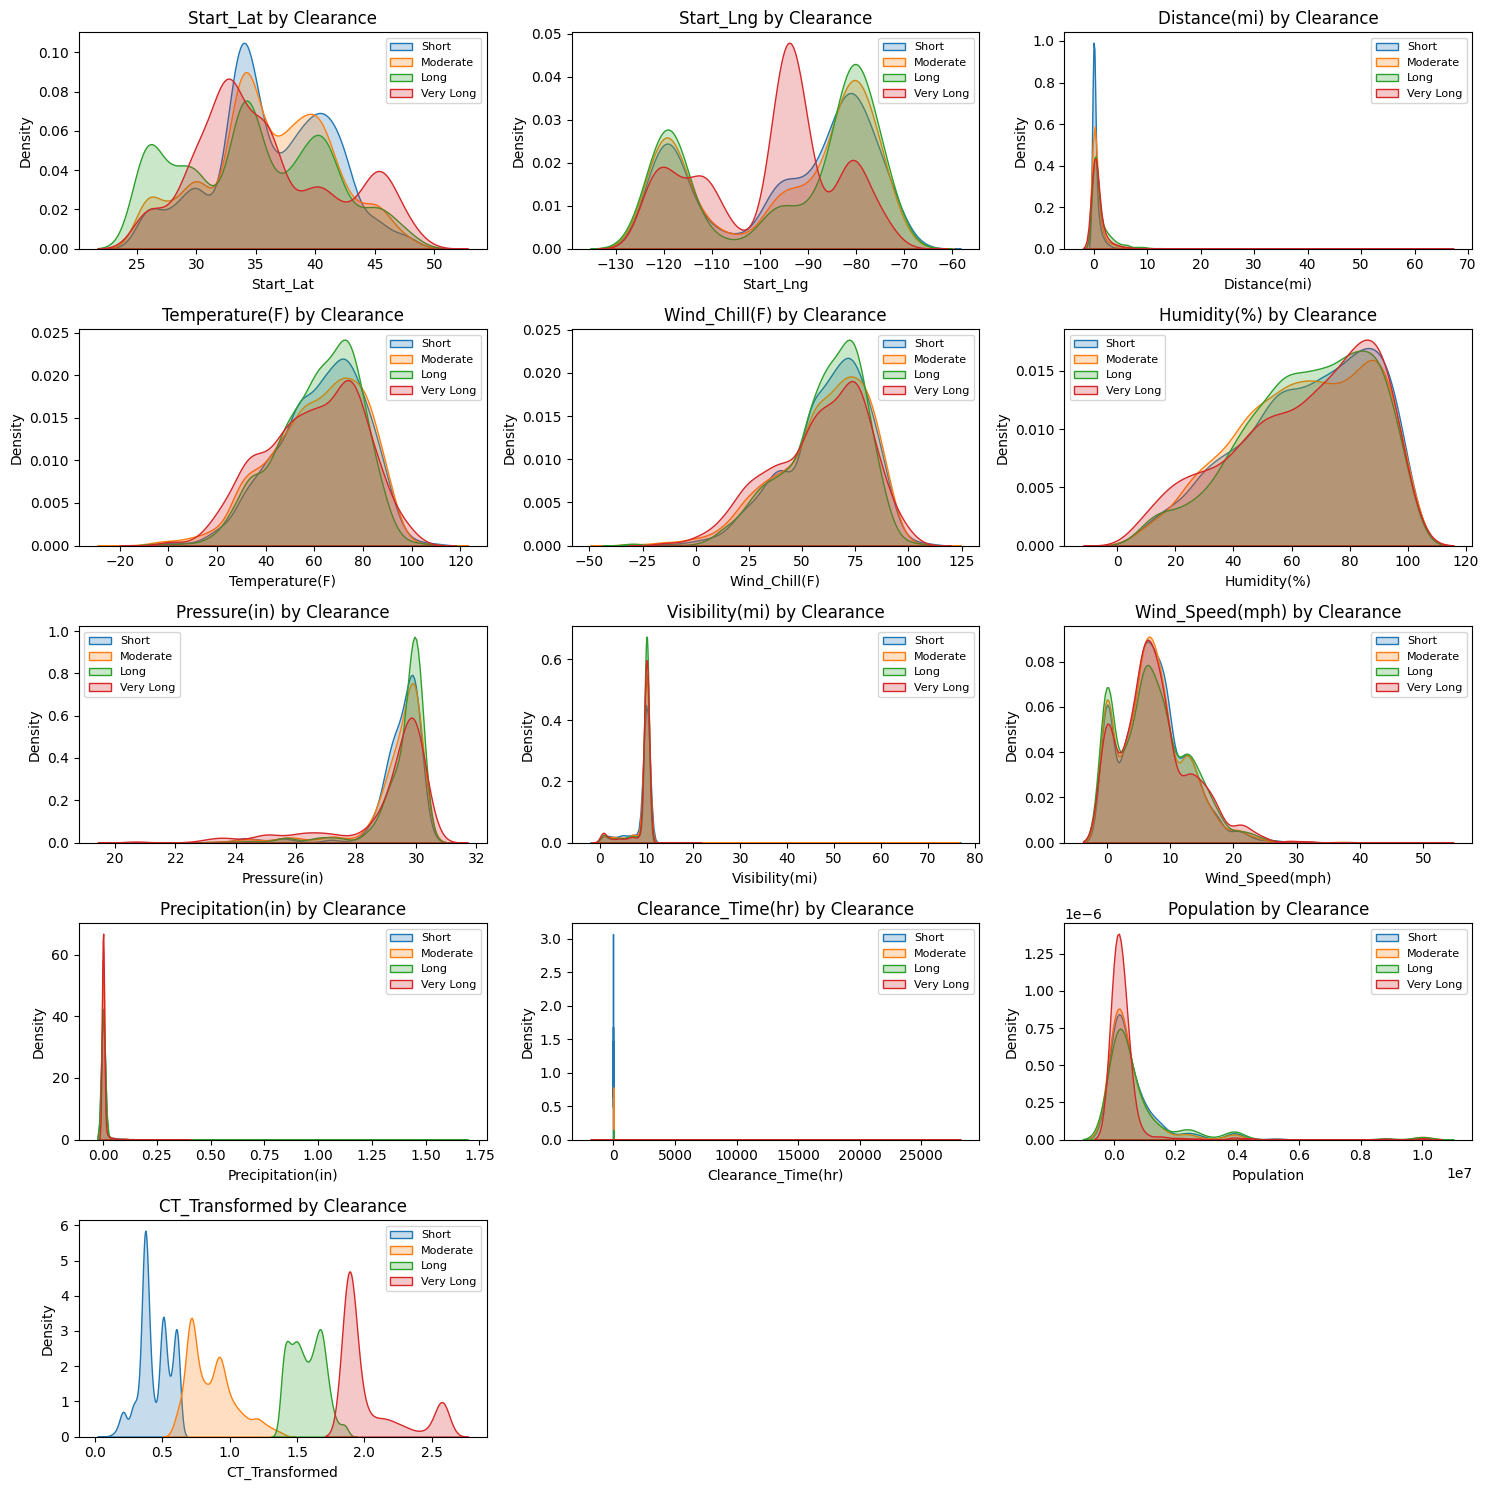

In [14]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Grid layout
n_cols = 3  # number of plots across
n_rows = math.ceil(len(num_cols) / n_cols)  # number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df[df['Clearance_Class']=="Short"], x=col, label='Short', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Clearance_Class']=="Moderate"], x=col, label='Moderate', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Clearance_Class']=="Long"], x=col, label='Long', fill=True, ax=axes[i])
    sns.kdeplot(data=df[df['Clearance_Class']=="Very Long"], x=col, label='Very Long', fill=True, ax=axes[i])

    axes[i].set_title(f'{col} by Clearance')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend(fontsize=8)

# If there are empty subplots, remove them
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Of interest, these distributions indicate that "Start_Lat" and "Start_Lng" offer the best separation of clearance class in numeric variables, while environmental conditions appear to offer very little separation.

---

## Distribution of Categorical Variables

I am going to plot the counts of the categorical variables to better understand the differences in their frequency. 

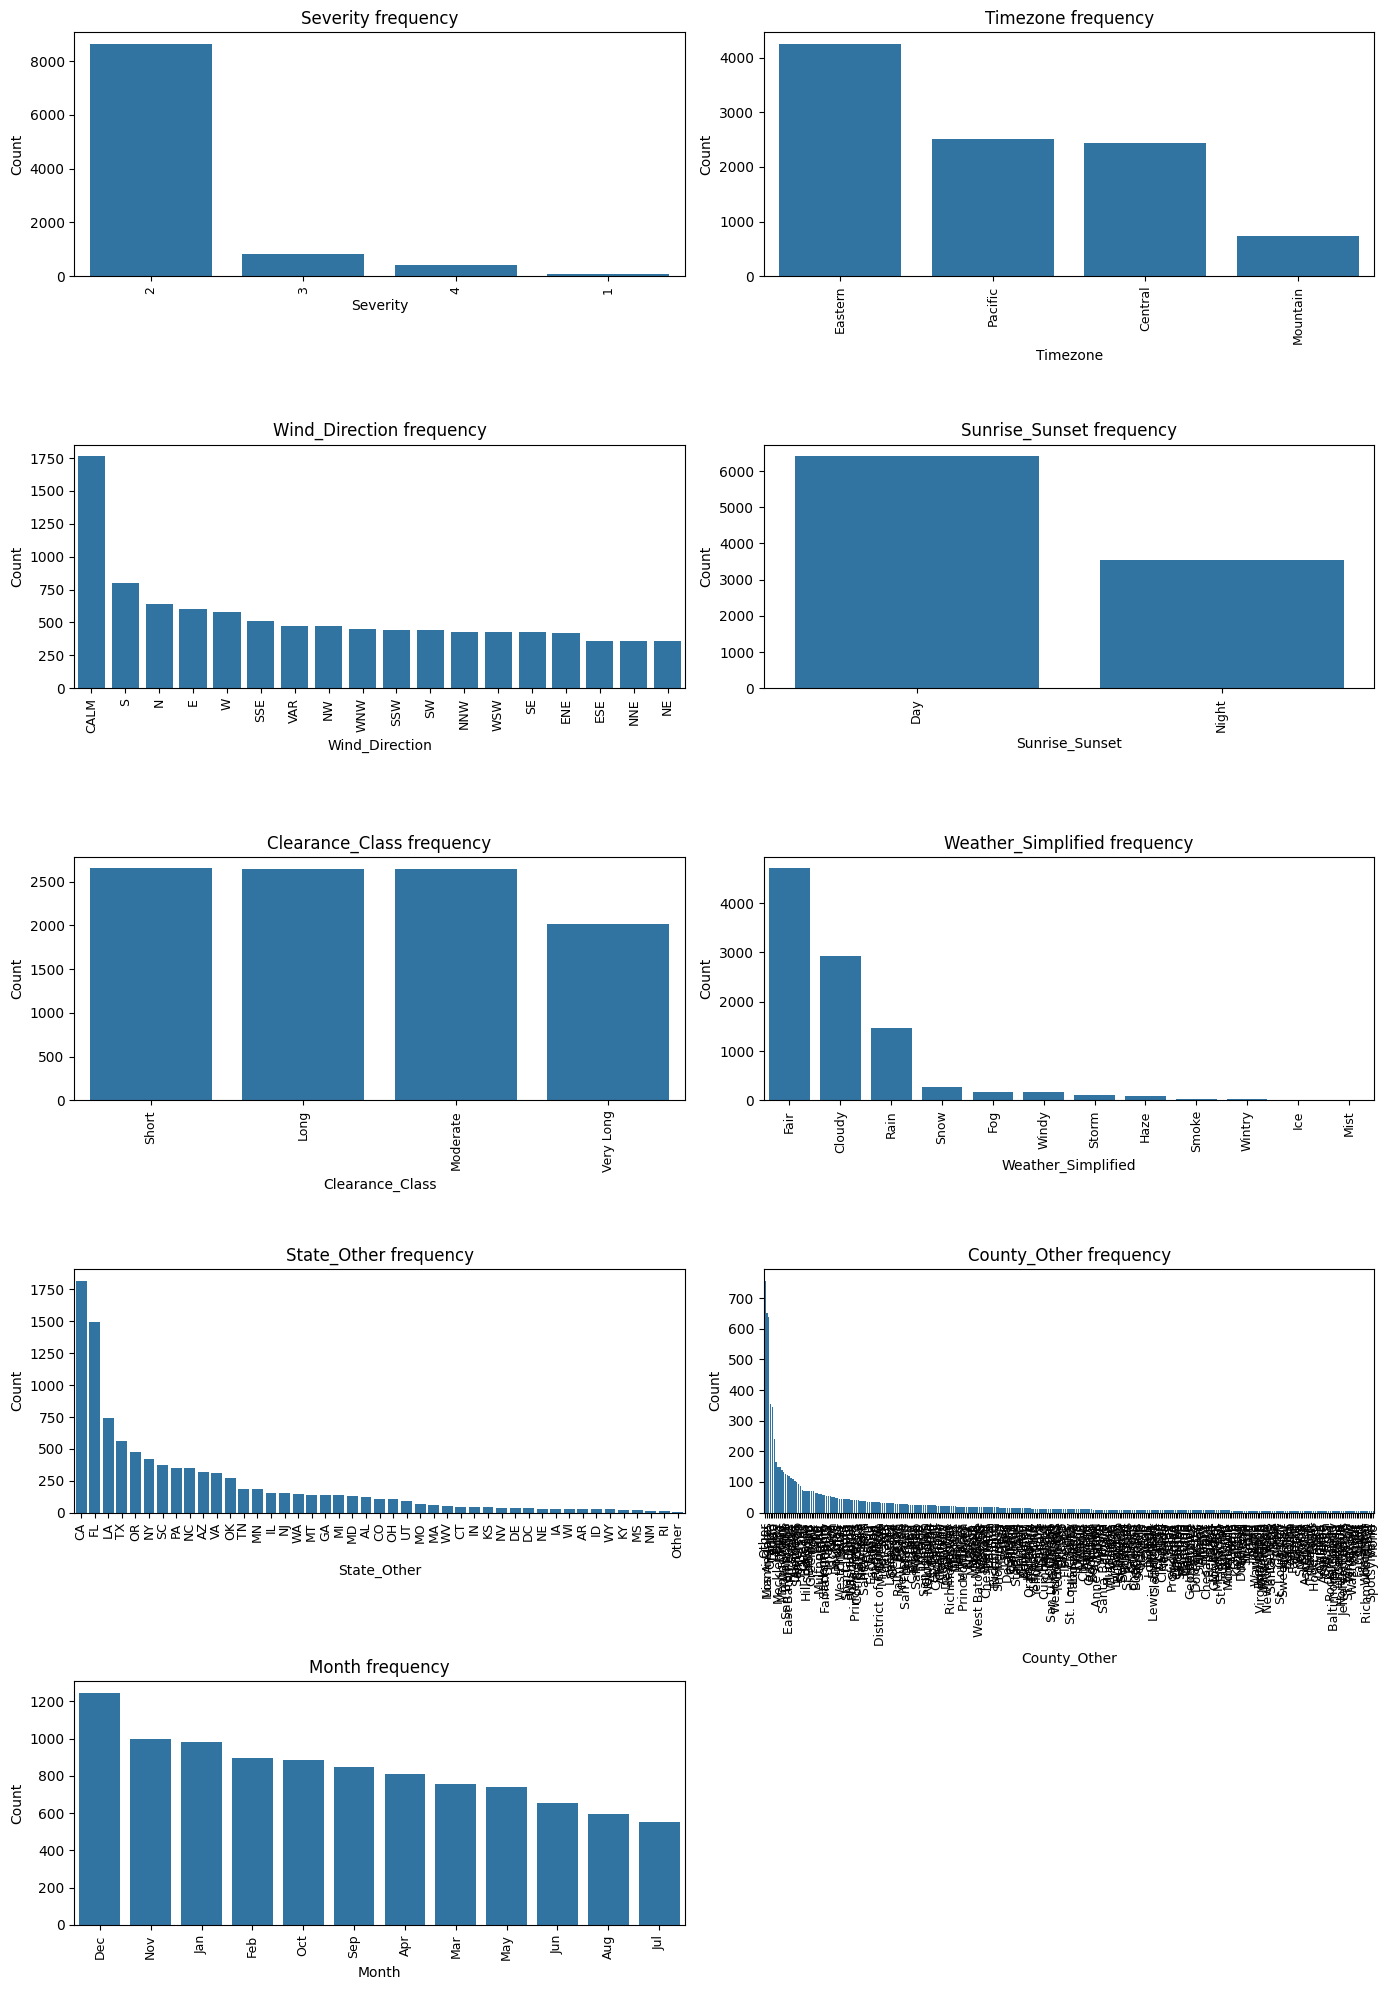

In [15]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Grid size
n = len(object_cols)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
axes = axes.flatten()

for idx, col in enumerate(object_cols):
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} frequency")
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

# Hide unused subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These visualisations make it clear that the vast majority of accidents are in the Severity = 2 category; most accidents occurred in Eastern Timezone; wind direct of "CALM"; during daylight hours; in fair weather; in the state "CA", so California; and during the month of December. Note, there are too many values of "County_Other" to plot, so I will refrain from doing so again.

Next, I am goig to plot the same variables (except "County_Other") but this time coloured by clearance class and as a proportion of the whole, as stacked bar charts, which will allow me to more easily see differences between the target class.

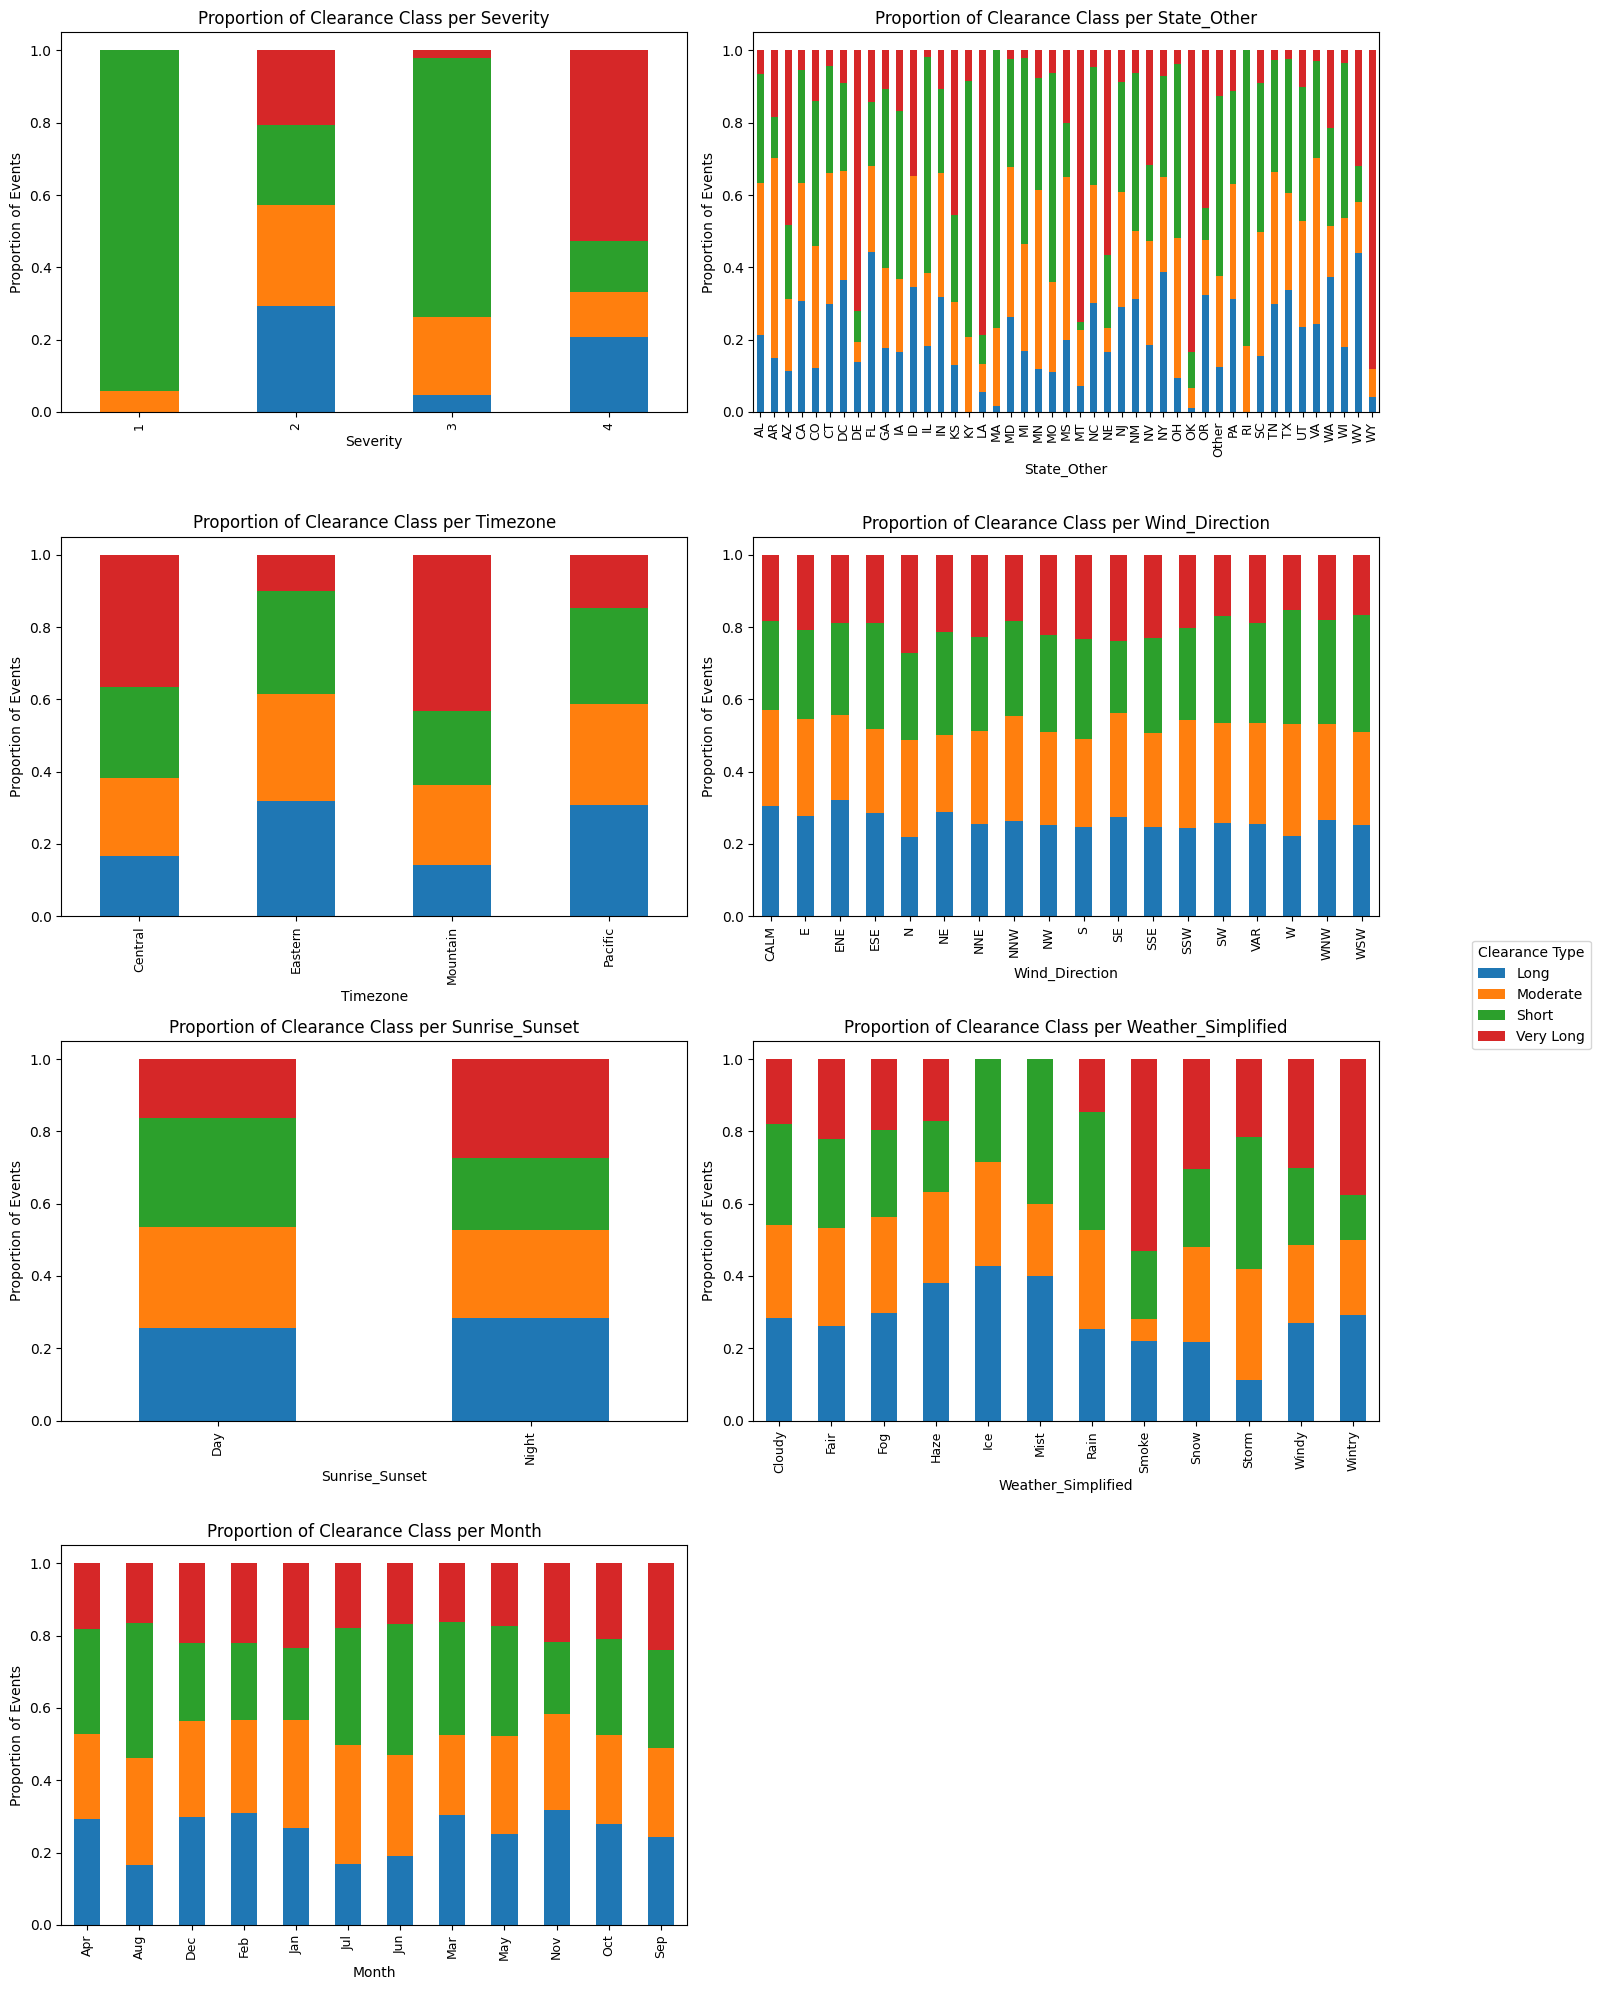

In [39]:
cat_col = ["Severity", "State_Other", "Timezone", "Wind_Direction", "Sunrise_Sunset", "Weather_Simplified", "Month"]

# Grid size
n = len(cat_col)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(cat_col):
    # Frequency table
    event_counts = pd.crosstab(df[col], df["Clearance_Class"])
    
    # Convert to proportions
    event_props = event_counts.div(event_counts.sum(axis=1), axis=0)

    # Plot stacked bar chart in the right subplot
    event_props.plot(
        kind="bar",
        stacked=True,
        ax=axes[idx],
        legend=False  # suppress legend in subplots, add once later
    )

    axes[idx].set_title(f"Proportion of Clearance Class per {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Proportion of Events")
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

# Add one legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Clearance Type", bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.tight_layout()
plt.show()

I can see that there appears to be differences in clearance class by "Severity", "State_Other", "Timezone", "Weather_Simplified" and "Month". The differences by "Wind_Direction" and "Sunrise_Sunset" appear very minimal.

I am going to use the chi-squared test, which asks if there are differences between the observed frequencies and those expected. The null hypothesis is that there are no differences, while the alternative hypothesis, which we accept when p < 0.05, is that there are differences. 

Another thing to note is that when datasets are very large, p values can easily be < 0.05. Cramer can be used in this case; a low value (<0.1) usually means the variable won’t be practically predictive, even if statistically significant.

I am only displaying the output for "Pearson" as this is the most widely used and interpretable version.

In [42]:
expected, observed, stats = pg.chi2_independence(data=df, x='Severity', y='Clearance_Class')
stats[stats['test'] == 'pearson']

c:\Users\sonia\Documents\VS Studio Projects\US_Accidents_ML_Project\.venv\Lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
c:\Users\sonia\Documents\VS Studio Projects\US_Accidents_ML_Project\.venv\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\sonia\Documents\VS Studio Projects\US_Accidents_ML_Project\.venv\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\sonia\Documents\VS Studio Projects\US_Accidents_ML_Project\.venv\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


test  lambda         chi2  dof  pval    cramer  power
0  pearson     1.0  1478.328658  9.0   0.0  0.222431    1.0

These warnings appear because a known limitation of the chi-squared test is the expectation that all observed frequencies < 5.  

Cells with low or zero frequencies were retained because they represent meaningful categories. The resulting chi-square test should be interpreted with caution due to low expected counts in some categories. For clarity, I will suppress the warnings when they appear but add **cautiously** to the summary statement to indicate the warning has been given,

I can **cautiously** accept the alternative hypothesis; the test indicates a statistical association between "Severity" and "Clearance_Class" i.e. the level of severity influences how accidents are cleared.

With Cramer = 0.22, this suggests "Severity" will have a moderate influence.

In [45]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='State_Other', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda         chi2    dof  pval    cramer  power
0  pearson     1.0  4704.481247  132.0   0.0  0.396794    1.0

I can **cautiously** accept the alternative hypothesis; the test indicates a statistical association between "State_Other" and "Clearance_Class" i.e. the State the accident occurred in influences how they are cleared.

While Cramer = 0.4 suggests "State_Other" will have a moderate to strong influence.

In [46]:
expected, observed, stats = pg.chi2_independence(data=df, x='Timezone', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda         chi2  dof           pval    cramer  power
0  pearson     1.0  1028.705732  9.0  1.112034e-215  0.185548    1.0

I can accept the alternative hypothesis; the test indicates a statistically strong association between "Timezone" and "Clearance_Class" i.e. the Timezone the accident occurred in influences how they are cleared.

While Cramer = 0.19 suggests this influence could be weak to moderate.

In [47]:
expected, observed, stats = pg.chi2_independence(data=df, x='Wind_Direction', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda        chi2   dof          pval    cramer     power
0  pearson     1.0  118.272829  51.0  2.901320e-07  0.062915  0.920377

I can accept the alternative hypothesis; the test indicates a statistical association between "Wind_Direction" and "Clearance_Class" i.e. the wind direction when the accident occurred influences how they are cleared.

However, Cramer = 0.06 suggests this influence will be very weak.

In [48]:
expected, observed, stats = pg.chi2_independence(data=df, x='Sunrise_Sunset', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda        chi2  dof          pval    cramer  power
0  pearson     1.0  252.571278  3.0  1.818382e-54  0.159244    1.0

I can accept the alternative hypothesis; the test indicates a statistically strong association between "Sunrise_Sunset" and "Clearance_Class" i.e. the time of day the accident occurred at influences how they are cleared.

While Cramer = 0.16 suggests this influence could be weak to moderate.

In [50]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='Weather_Simplified', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda        chi2   dof          pval    cramer     power
0  pearson     1.0  160.158104  33.0  1.268703e-18  0.073212  0.996287

I can **cautiously** accept the alternative hypothesis; the test indicates a statistical association between "Weather_Simplified" and "Clearance_Class" i.e. the weather condition influences how accidents are cleared.

However, with Cramer = 0.07, this suggests "Weather_Simplified" will have a very weak influence.

In [10]:
expected, observed, stats = pg.chi2_independence(data=df, x='Month', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda        chi2   dof          pval    cramer     power
0  pearson     1.0  273.098481  33.0  1.352420e-39  0.095603  0.999998

I can accept the alternative hypothesis; the test indicates a statistical association between "Month" and "Clearance_Class" i.e. the month the accident occurred in influences how accidents are cleared.

However, with Cramer = 0.1, this suggests "Month" will have a largely weak influence.

In [52]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='County_Other', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda         chi2    dof  pval    cramer  power
0  pearson     1.0  6189.632627  978.0   0.0  0.455137    1.0

I can **cautiously** accept the alternative hypothesis; the test indicates a statistical association between "County_Other" and "Clearance_Class" i.e. the county the accident occurred in influences how they are cleared.

With Cramer = 0.5, this suggests "County_Other" will have a moderate influence.

Of interest, in agreement with the differences in distribution of clearance classes for "Start_Lat" and "Start_Lng", categories based on location, "State_Other" and "County_Other", also show the most statistically significant differences in clearance class, along with "Severity".  

"Timezone", "Sunrise_Sunset", "Month", "Weather_Simplified" and "Wind_Direction" were also found to have statistical differences in clearance classes.

---

## Distribution of Boolean Variables

A boolean is a specific type of categorical variable, so I will use both the visualisations and tests used previously for categorical variables.

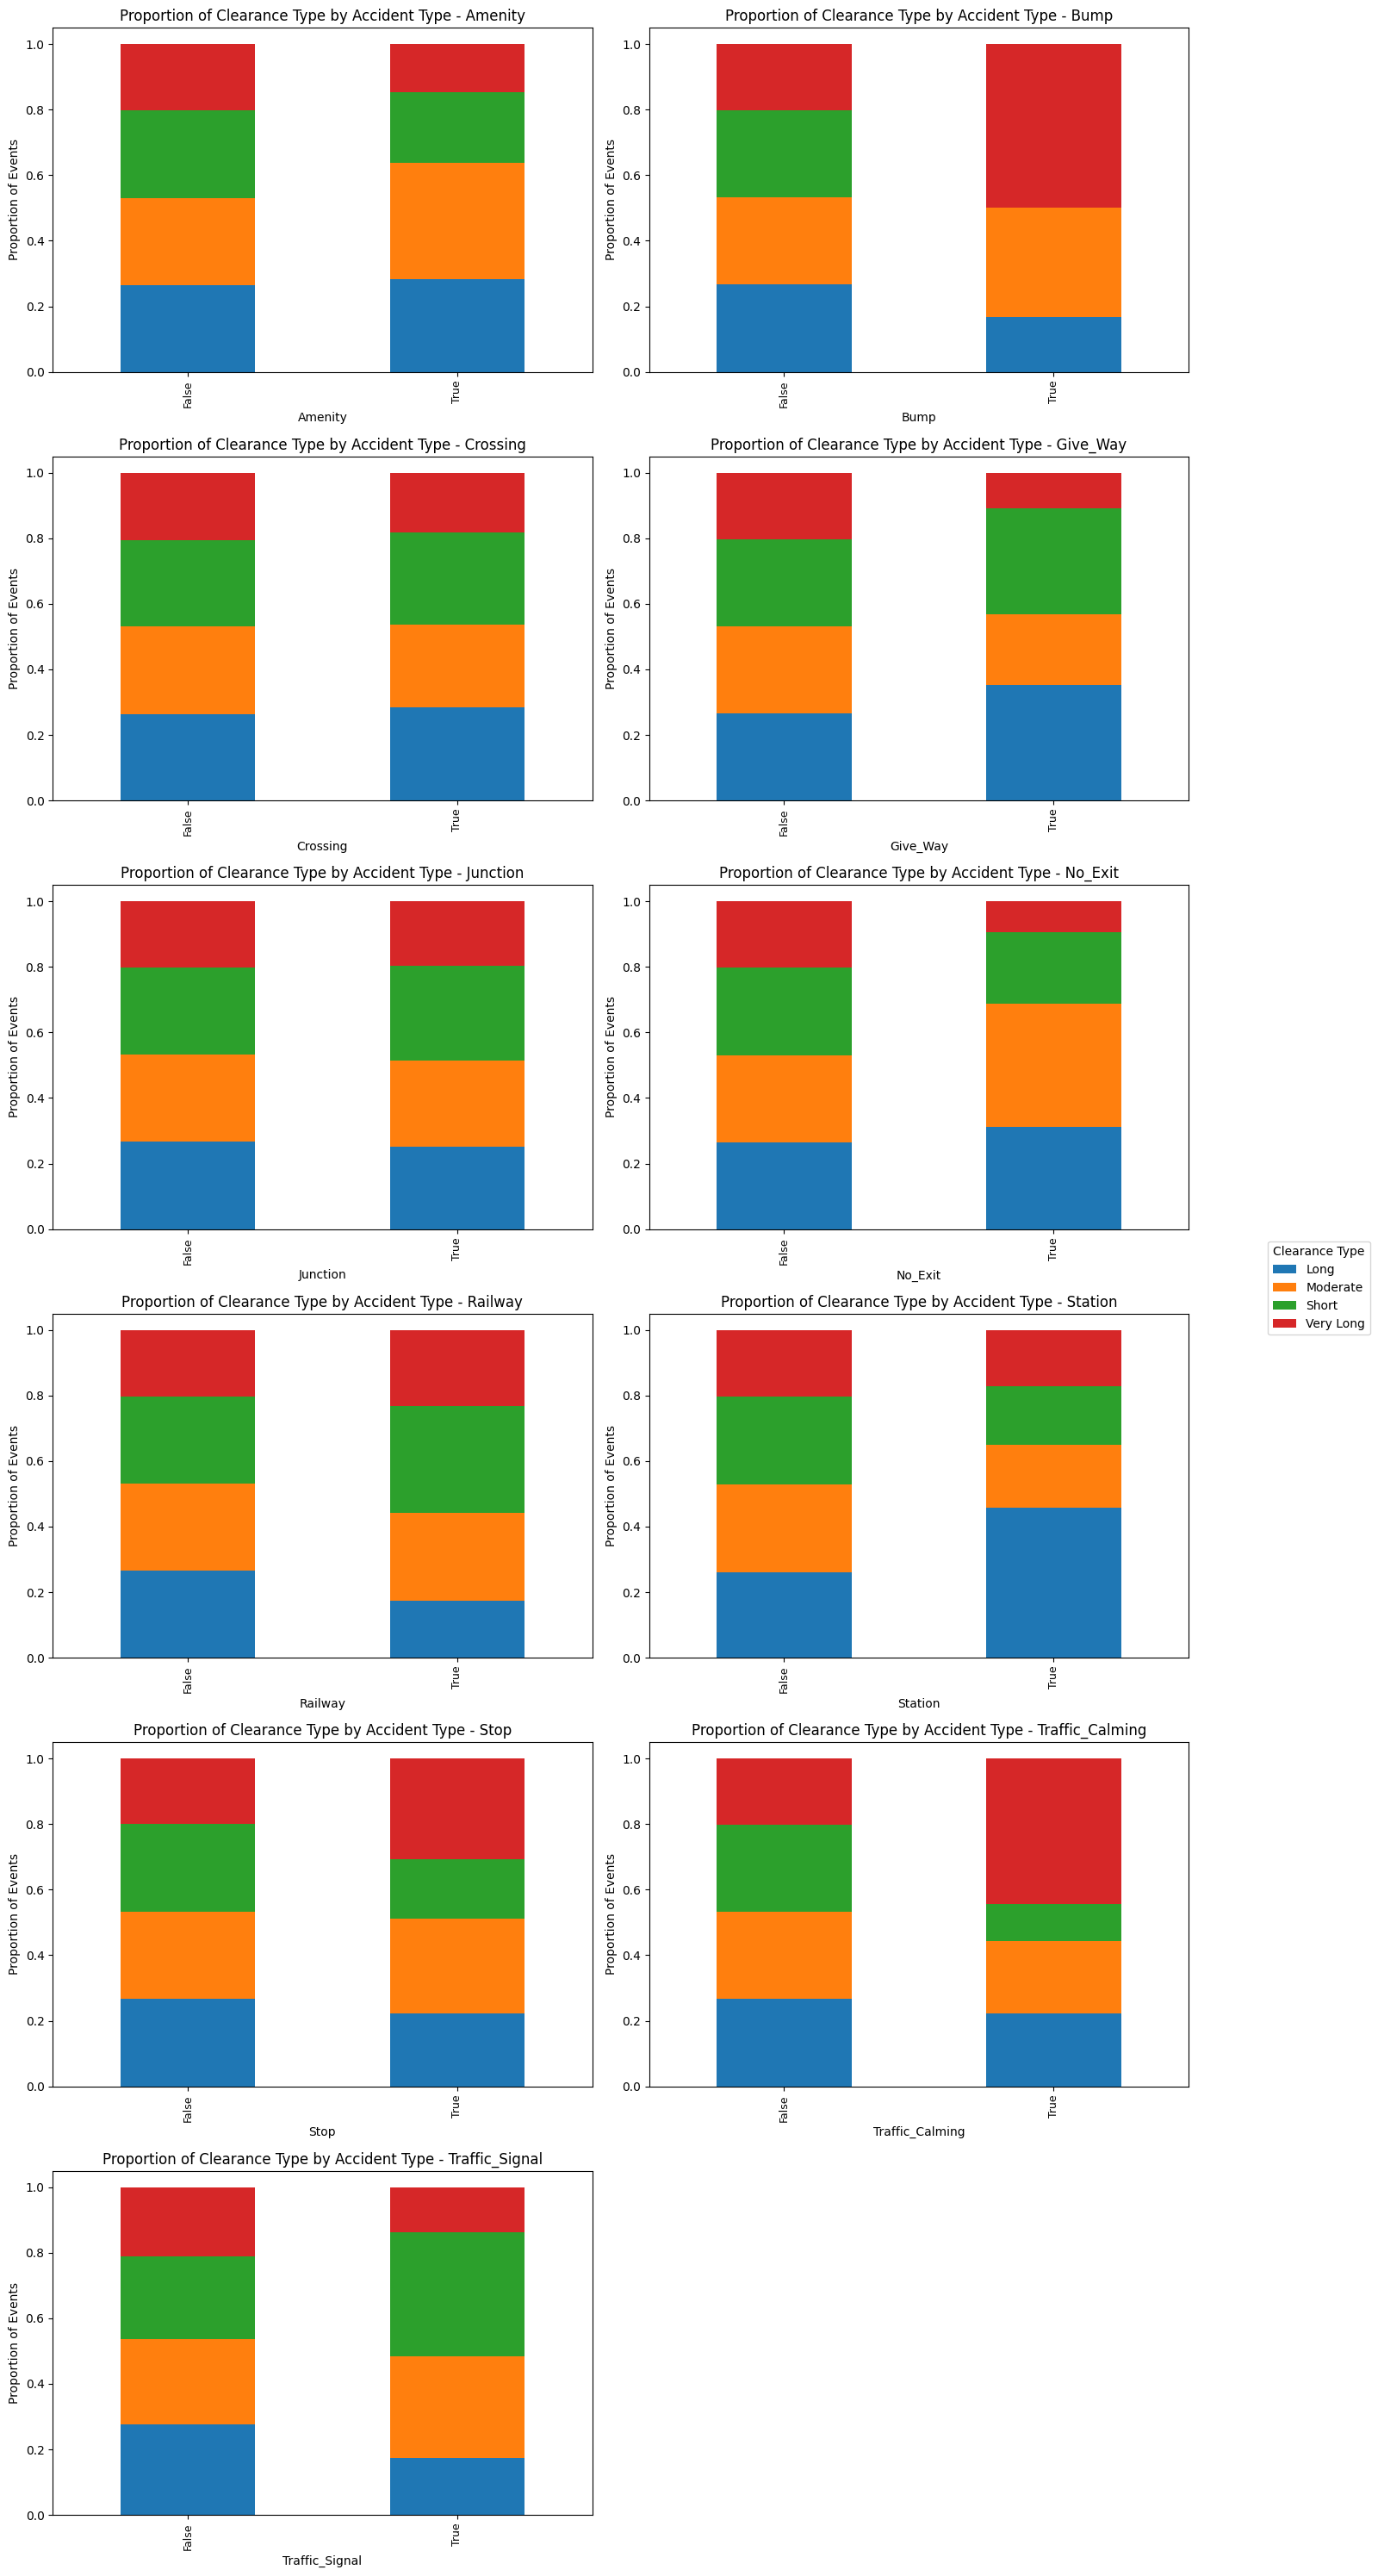

In [53]:
boolean_cols = df.select_dtypes(include=['boolean']).columns.tolist()

# Grid size
n = len(boolean_cols)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(boolean_cols):
    # Frequency table
    event_counts = pd.crosstab(df[col], df["Clearance_Class"])
    
    # Convert to proportions
    event_props = event_counts.div(event_counts.sum(axis=1), axis=0)

    # Plot stacked bar chart in the right subplot
    event_props.plot(
        kind="bar",
        stacked=True,
        ax=axes[idx],
        legend=False  # suppress legend in subplots, add once later
    )

    axes[idx].set_title(f"Proportion of Clearance Type by Accident Type - {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Proportion of Events")
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

# Add one legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Clearance Type", bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.tight_layout()
plt.show()

Visually, it looks like "Bump", "Station" and "Traffic_Calming" are most associated with changes in "Clearance_Class".

I am going to conduct chi-squared tests to get a better understanding.

In [54]:
expected, observed, stats = pg.chi2_independence(data=df, x='Amenity', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  6.994985  3.0  0.072058  0.026501  0.589251

I cannot accept the alternative hypothesis; there is no statistical association between "Amenity" and "Clearance_Class" i.e. whether the accident occurred by an amenity does not influence how they are cleared. 

In [56]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='Bump', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda      chi2  dof     pval    cramer     power
0  pearson     1.0  4.559657  3.0  0.20703  0.021396  0.404828

I cannot accept the alternative hypothesis; there is no statistical association between "Bump" and "Clearance_Class" i.e. whether the accident occurred as a bump does not influence how they are cleared.

As the chart for "Bump" appears to show significant differences to "Clearance_Class", I'm going to take a look at the contingency table.

In [63]:
# Example boolean column
bool_col = 'Bump'  # replace with your column name
target_col = 'Clearance_Class'

# Create the contingency table
contingency_table = pd.crosstab(df[bool_col], df[target_col])

print(contingency_table)

Clearance_Class  Long  Moderate  Short  Very Long
Bump                                             
False            2648      2645   2651       2010
True                1         2      0          3


These low counts mean that the chi-squared approximations break down and there isn't enough statistical power to detect a meaningful association.

In [59]:
expected, observed, stats = pg.chi2_independence(data=df, x='Crossing', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  5.748344  3.0  0.124517  0.024024  0.499076

I cannot accept the alternative hypothesis; there is no statistical association between "Crossing" and "Clearance_Class" i.e. whether the accident occurred at a crossing does not influence how they are cleared. 

Once again, statistical power to detect an association is low.

In [70]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='Give_Way', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda     chi2  dof      pval   cramer  power
0  pearson     1.0  3.45675  3.0  0.326415  0.01863  0.313

I cannot accept the alternative hypothesis; there is no statistical association between "Give_Way" and "Clearance_Class" i.e. whether the accident occurred at a give way does not influence how they are cleared. 

Once again, statistical power to detect an association is low.

In [61]:
expected, observed, stats = pg.chi2_independence(data=df, x='Junction', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  2.084993  3.0  0.554955  0.014468  0.199082

I cannot accept the alternative hypothesis; there is no statistical association between "Junction" and "Clearance_Class" i.e. whether the accident occurred at a junction does not influence how they are cleared. 

Once again, statistical power to detect an association is low.

In [71]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='No_Exit', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda      chi2  dof      pval    cramer    power
0  pearson     1.0  3.839025  3.0  0.279379  0.019633  0.34508

I cannot accept the alternative hypothesis; there is no statistical association between "No_Exit" and "Clearance_Class" i.e. whether the accident occurred at a No Exit does not influence how they are cleared. 

Once again, statistical power to detect an association is low.

In [66]:
expected, observed, stats = pg.chi2_independence(data=df, x='Railway', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda      chi2  dof      pval    cramer    power
0  pearson     1.0  4.282972  3.0  0.232485  0.020737  0.38205

I cannot accept the alternative hypothesis; there is no statistical association between "Railway" and "Clearance_Class" i.e. whether the accident occurred at a railway does not influence how they are cleared. 

Once again, statistical power to detect an association is low.

In [67]:
expected, observed, stats = pg.chi2_independence(data=df, x='Station', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda       chi2  dof          pval    cramer  power
0  pearson     1.0  56.741322  3.0  2.918297e-12  0.075478    1.0

I can accept the alternative hypothesis; there is a statistical association between "Station" and "Clearance_Class" i.e. whether the accident occurred at a gas station does influence how they are cleared. 

However, Cramer = 0.07 suggests this will have a very weak influence.

In [68]:
expected, observed, stats = pg.chi2_independence(data=df, x='Stop', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda       chi2  dof      pval    cramer     power
0  pearson     1.0  30.102352  3.0  0.000001  0.054976  0.998385

I can accept the alternative hypothesis; there is a statistical association between "Stop" and "Clearance_Class" i.e. whether the accident occurred at a stop sign does influence how they are cleared. 

However, Cramer = 0.05 suggests this will have a very weak influence.

In [72]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    expected, observed, stats = pg.chi2_independence(data=df, x='Traffic_Calming', y='Clearance_Class')

stats[stats['test'] == 'pearson']

test  lambda      chi2  dof      pval    cramer     power
0  pearson     1.0  3.560232  3.0  0.313034  0.018906  0.321696

I cannot accept the alternative hypothesis; there is no statistical association between "Traffic_Calming" and "Clearance_Class" i.e. whether the accident occurred at a traffic calming measure does not influence how they are cleared. 

Once again, statistical power to detect an association is low.

In [73]:
expected, observed, stats = pg.chi2_independence(data=df, x='Traffic_Signal', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda        chi2  dof          pval    cramer  power
0  pearson     1.0  131.782001  3.0  2.233721e-28  0.115027    1.0

I can accept the alternative hypothesis; there is a statistical association between "Traffic_Signal" and "Clearance_Class" i.e. whether the accident occurred at a traffic signal does influence how they are cleared. 

With Cramer = 0.05, this suggests it will have a weak influence.

In summary, "Traffic_Signal", "Station" and "Stop" show statistical differences between clearance classes, indicating that they do influence accidents clearance. 

---

## Clearance Times by Categorical Variable

I am going to plot "CT_Transformed" for each categorical variable (except "County_Other"). YJ transformed clearance times are being plotted instead of "Clearance_Time(hr)" because otherwise the range is too great to be visualised meaningfully.

I am using box plots with whiskers because I know the data is skewed and this shows the median, IQR and outliers.

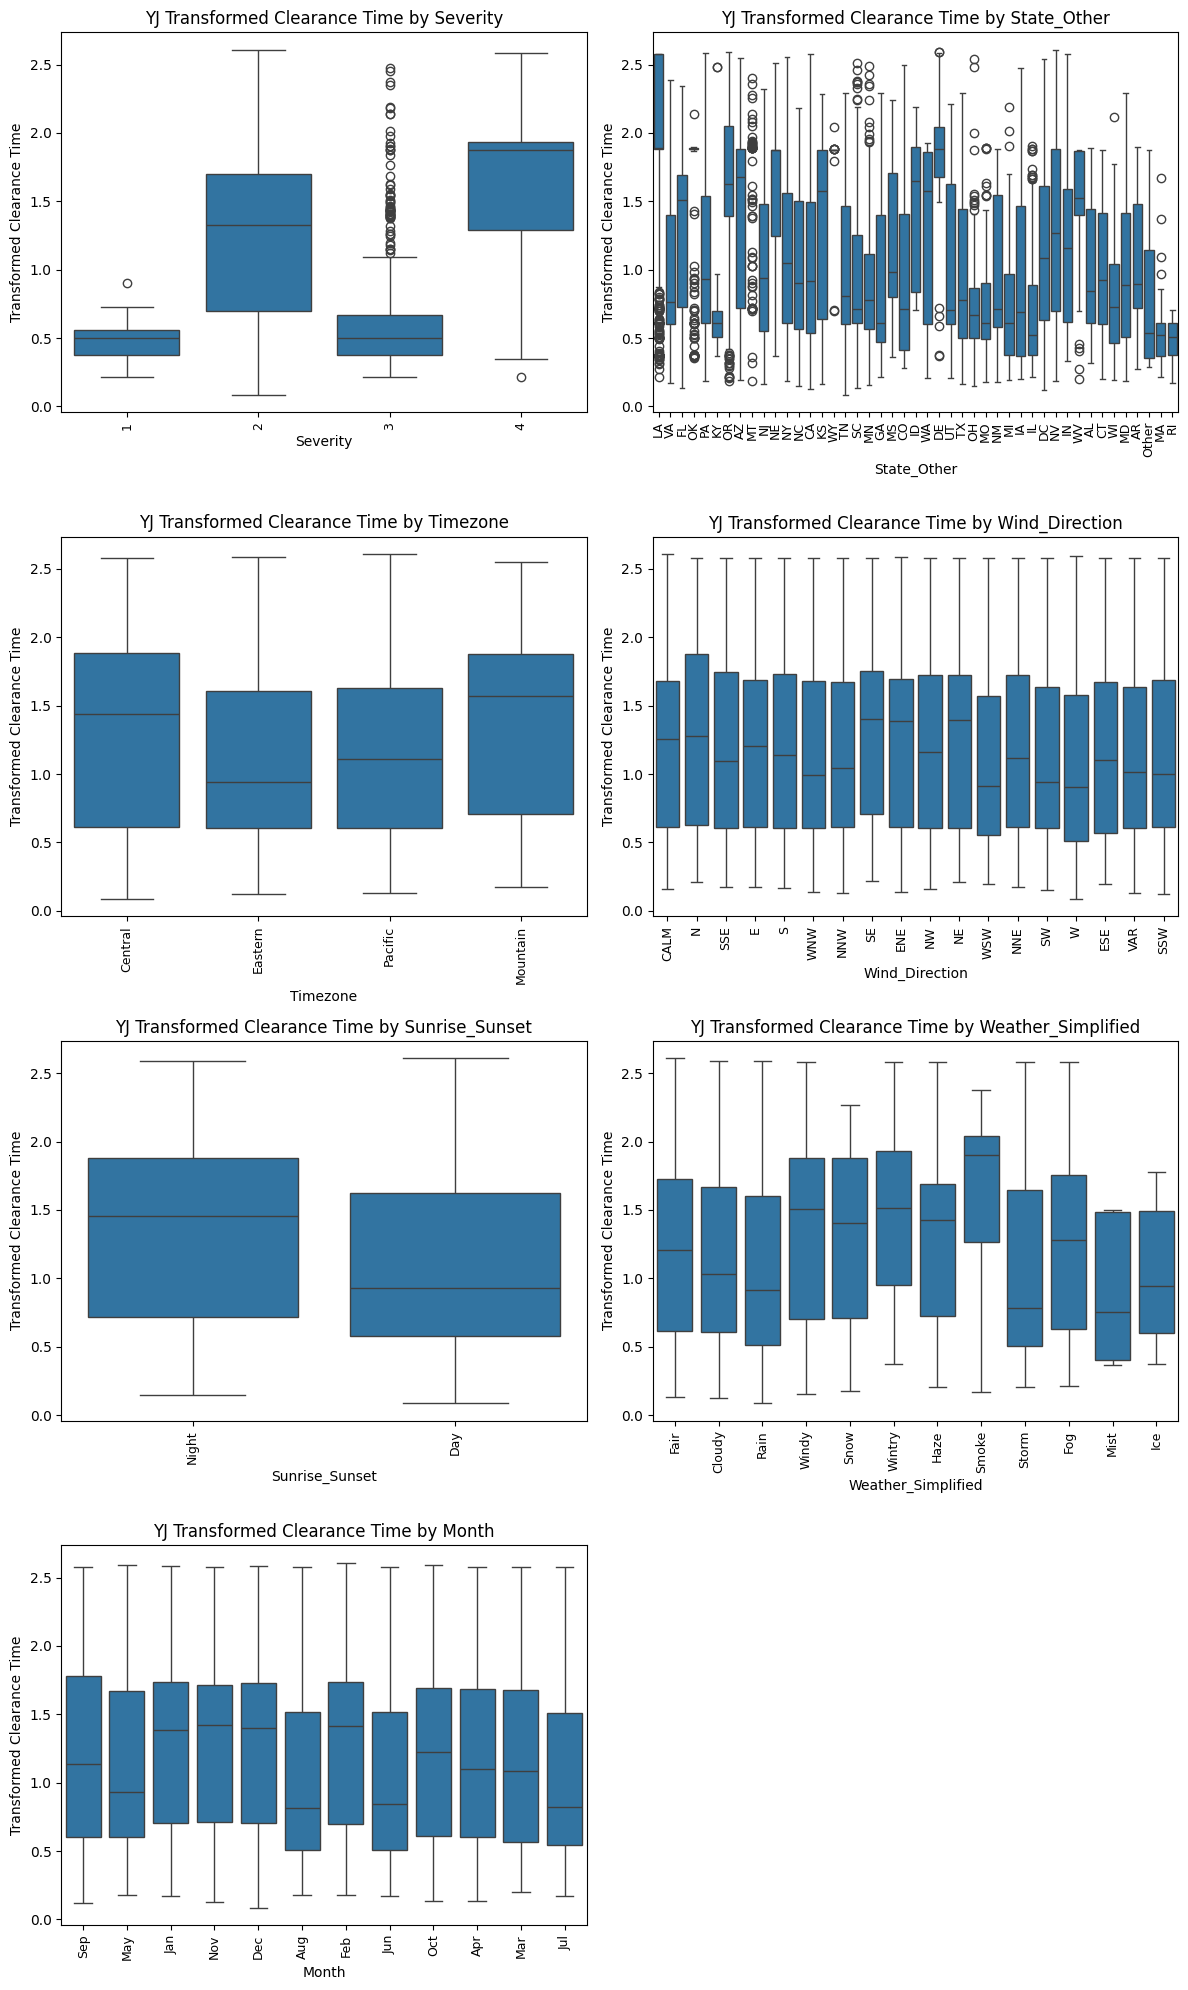

In [75]:
cat_col = ["Severity", "State_Other", "Timezone", "Wind_Direction", "Sunrise_Sunset", "Weather_Simplified", "Month"]

# Grid size
n = len(cat_col)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(cat_col):
    sns.boxplot(
        x=col,
        y="CT_Transformed",
        data=df,
        ax=axes[idx]
    )
    axes[idx].set_title(f"YJ Transformed Clearance Time by {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Transformed Clearance Time")
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the plots, it appears that there are large differences in the mean clearance times by "Severity" and "State_Other". The other categories also show some variation. 

I am going to use the Kruskal-Wallis test, a non-parametric test for more than 2 groups, that tests whether the samples original from the same distribution. The null hyporthesis is that they are the same, while the alternative is that they are different. 

In [76]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Initialize results list
kruskal_results = []

for col in cat_cols:
    try:
        # Run Kruskal-Wallis test
        result = pg.kruskal(data=df, dv='Clearance_Time(hr)', between=col)
        
        # Append results with the variable name
        kruskal_results.append({
            'variable': col,
            'H': result['H'].iloc[0],          # test statistic
            'pval': result['p-unc'].iloc[0]    # p-value
        })
    except Exception as e:
        print(f"Could not run Kruskal-Wallis for {col}: {e}")
        kruskal_results.append({
            'variable': col,
            'H': None,
            'pval': None
        })

# Convert results to DataFrame
kruskal_df = pd.DataFrame(kruskal_results).sort_values(by='pval').reset_index(drop=True)

kruskal_df

variable            H           pval
0     Clearance_Class  9314.801901   0.000000e+00
1         State_Other  2379.448842   0.000000e+00
2        County_Other  2878.385885   0.000000e+00
3            Severity  1066.736294  5.991452e-231
4      Sunrise_Sunset   274.069156   1.472578e-61
5            Timezone   234.149493   1.752320e-50
6               Month   186.989475   3.686538e-34
7  Weather_Simplified   103.649390   3.372830e-17
8      Wind_Direction    61.570839   5.771905e-07

I can accept the alternative hypothesis for all the categorical variables tested i.e. they have a significant effect on clearance times. 

Ignoring "Clearance_Class" itself, "State_Other" and "County_Other" have the highest probability of having a different distribution to "Clearance_Time(hr), in agreement with chi-ssquared test results on "Clearance_Class", suggesting a real effect.

---

## Clearance Times by Boolean Variable

Next, I will plot "CT_Transformed" for each boolean variable. I am using box plots which are suitable for skewed data. 

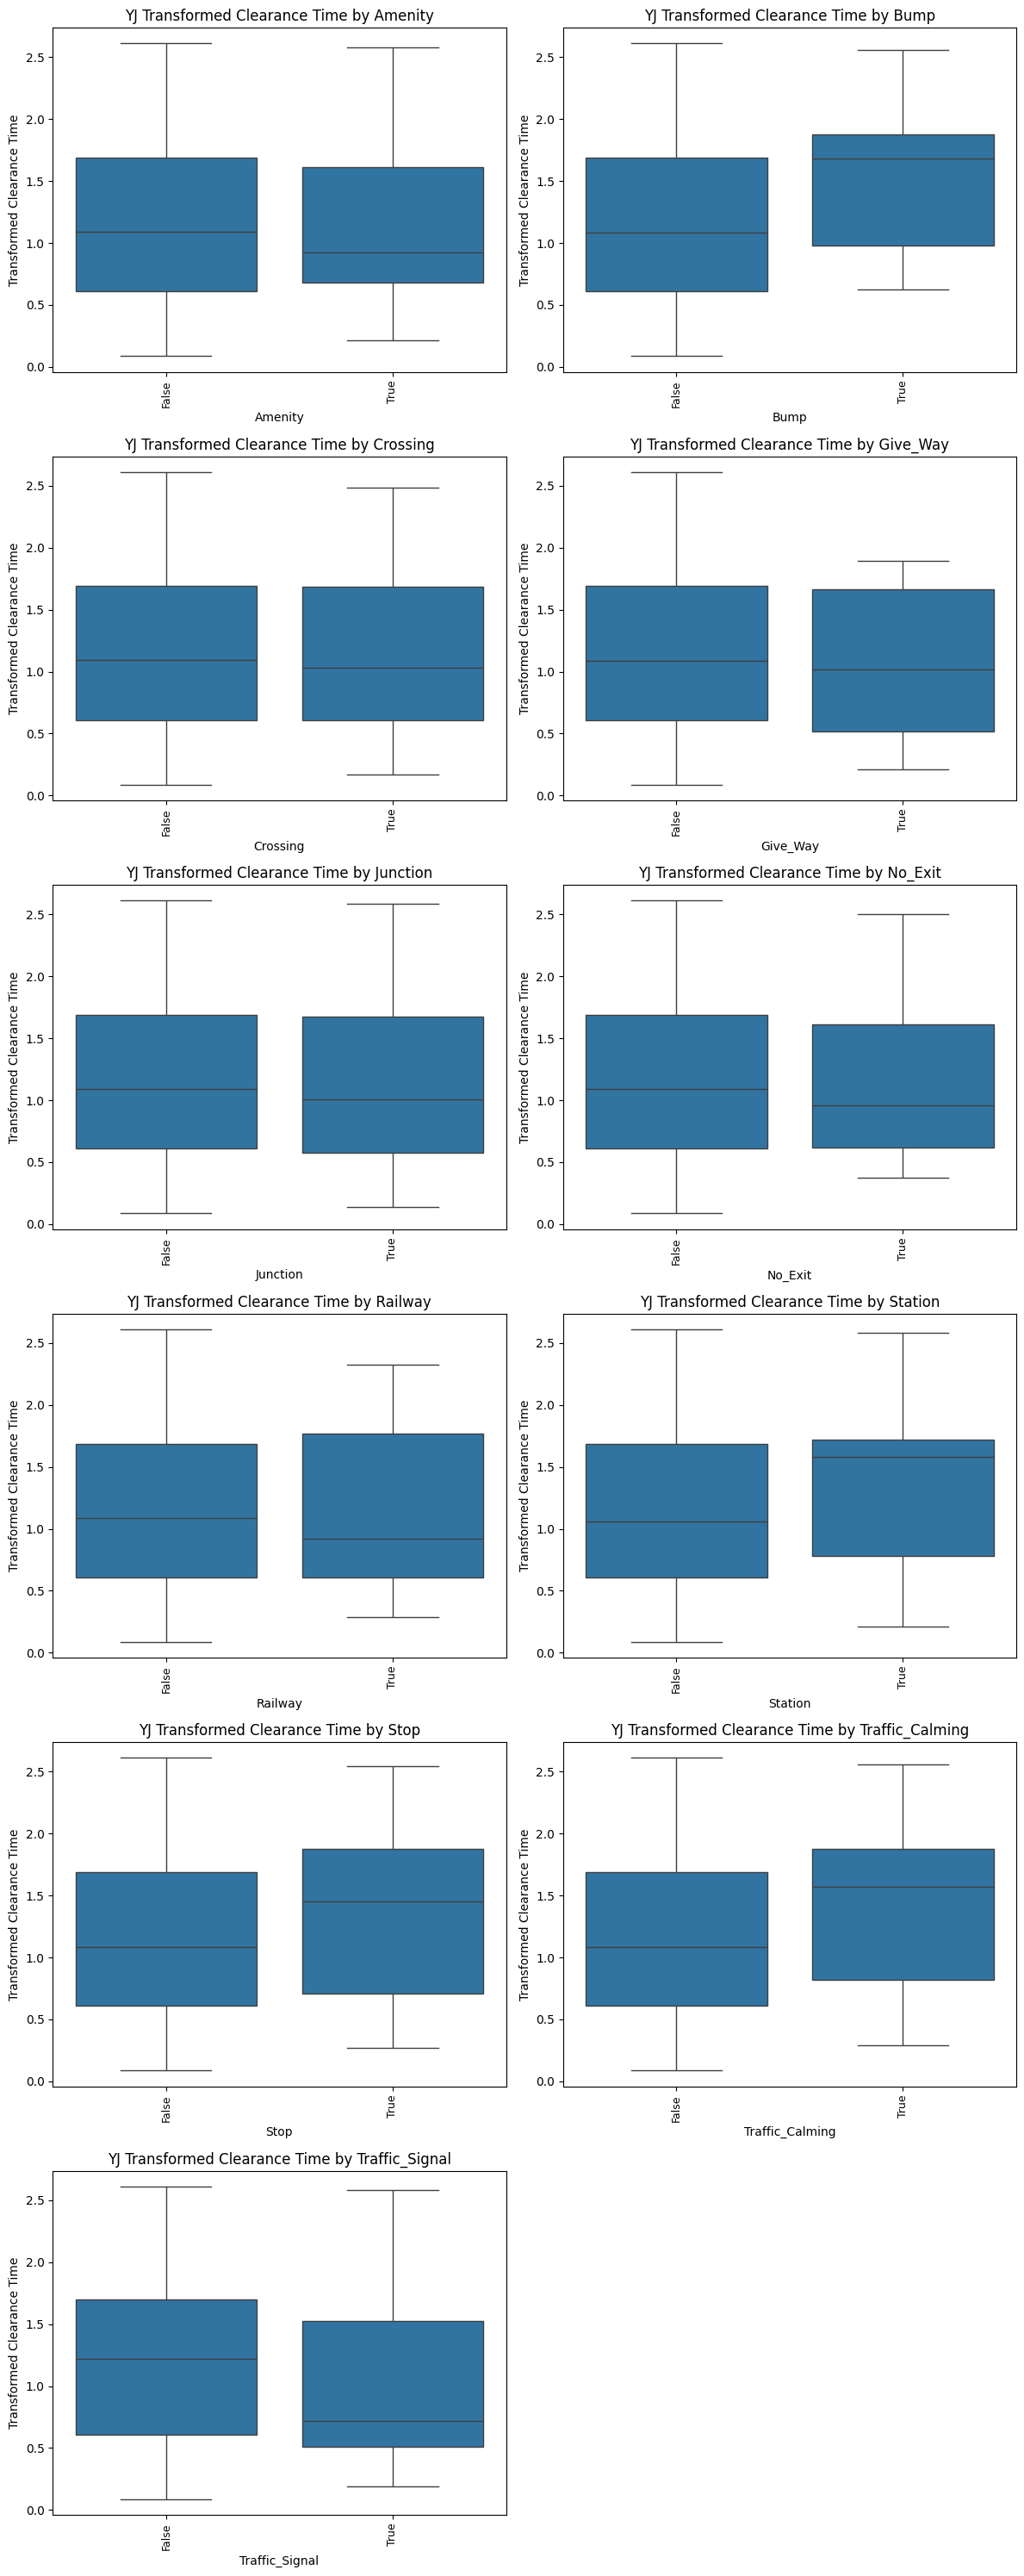

In [77]:
boolean_cols = df.select_dtypes(include=['boolean']).columns.tolist()

# Grid size
n = len(boolean_cols)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for idx, col in enumerate(boolean_cols):
    sns.boxplot(
        x=col,
        y="CT_Transformed",
        data=df,
        ax=axes[idx]
    )
    axes[idx].set_title(f"YJ Transformed Clearance Time by {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Transformed Clearance Time")
    axes[idx].tick_params(axis="x", rotation=90, labelsize=9)

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

I am going to use the Mann-Whitney U test which is for non-parametric data and asks whether there differences in the distribution between 2 groups. The null hypothesis is that they are the same, while the alternate hypothesis, which is accepted if p < 0.05, is that there are differences. 

In [91]:
boolean_cols = df.select_dtypes(include=['boolean']).columns.tolist()

# Create an empty list to store results
results = []

# Loop through each boolean column
for col in boolean_cols:
    try:
        res = pg.mwu(x=df.loc[df[col] == True, 'Clearance_Time(hr)'],
                     y=df.loc[df[col] == False, 'Clearance_Time(hr)'])
        res.insert(0, 'Variable', col)
        results.append(res)
    except Exception as e:
        print(f"Error with {col}: {e}")

# Concatenate all results into one DataFrame
results_df = pd.concat(results, ignore_index=True)

# Display only selected columns neatly
results_df[['Variable', 'U-val', 'alternative', 'p-val', 'RBC', 'CLES']]

Variable      U-val alternative         p-val       RBC      CLES
0           Amenity   587784.0   two-sided  4.883619e-01 -0.036154  0.481923
1              Bump    38720.0   two-sided  2.083941e-01  0.296631  0.648316
2          Crossing  4797339.5   two-sided  3.115165e-01 -0.018650  0.490675
3          Give_Way   164780.0   two-sided  2.816509e-01 -0.102386  0.448807
4          Junction  2938619.5   two-sided  1.972169e-01 -0.030184  0.484908
5           No_Exit   148797.0   two-sided  5.359794e-01 -0.063274  0.468363
6           Railway   404787.5   two-sided  4.559365e-01 -0.046621  0.476689
7           Station  1605905.5   two-sided  3.428203e-06  0.160855  0.580427
8              Stop  1674676.0   two-sided  6.921895e-04  0.112676  0.556338
9   Traffic_Calming    55205.0   two-sided  2.266234e-01  0.232819  0.616409
10   Traffic_Signal  3855071.5   two-sided  3.025615e-27 -0.200603  0.399698

These results indicate that I can accept the alternate hypothesis for "Traffic_Signal", "Station" and "Stop" i.e. they do have an effect on clearance times.

This is in agreement with results looking at distributions of "Clearance_Class" using chi-squared testing.

---

## Correlations with Clearnace Time

I am going to use a scatter chart to plot numerical variables against CT_Transformed. I am plotting against the YJ transoformed clearance times to be able to visualise the data and any trends.

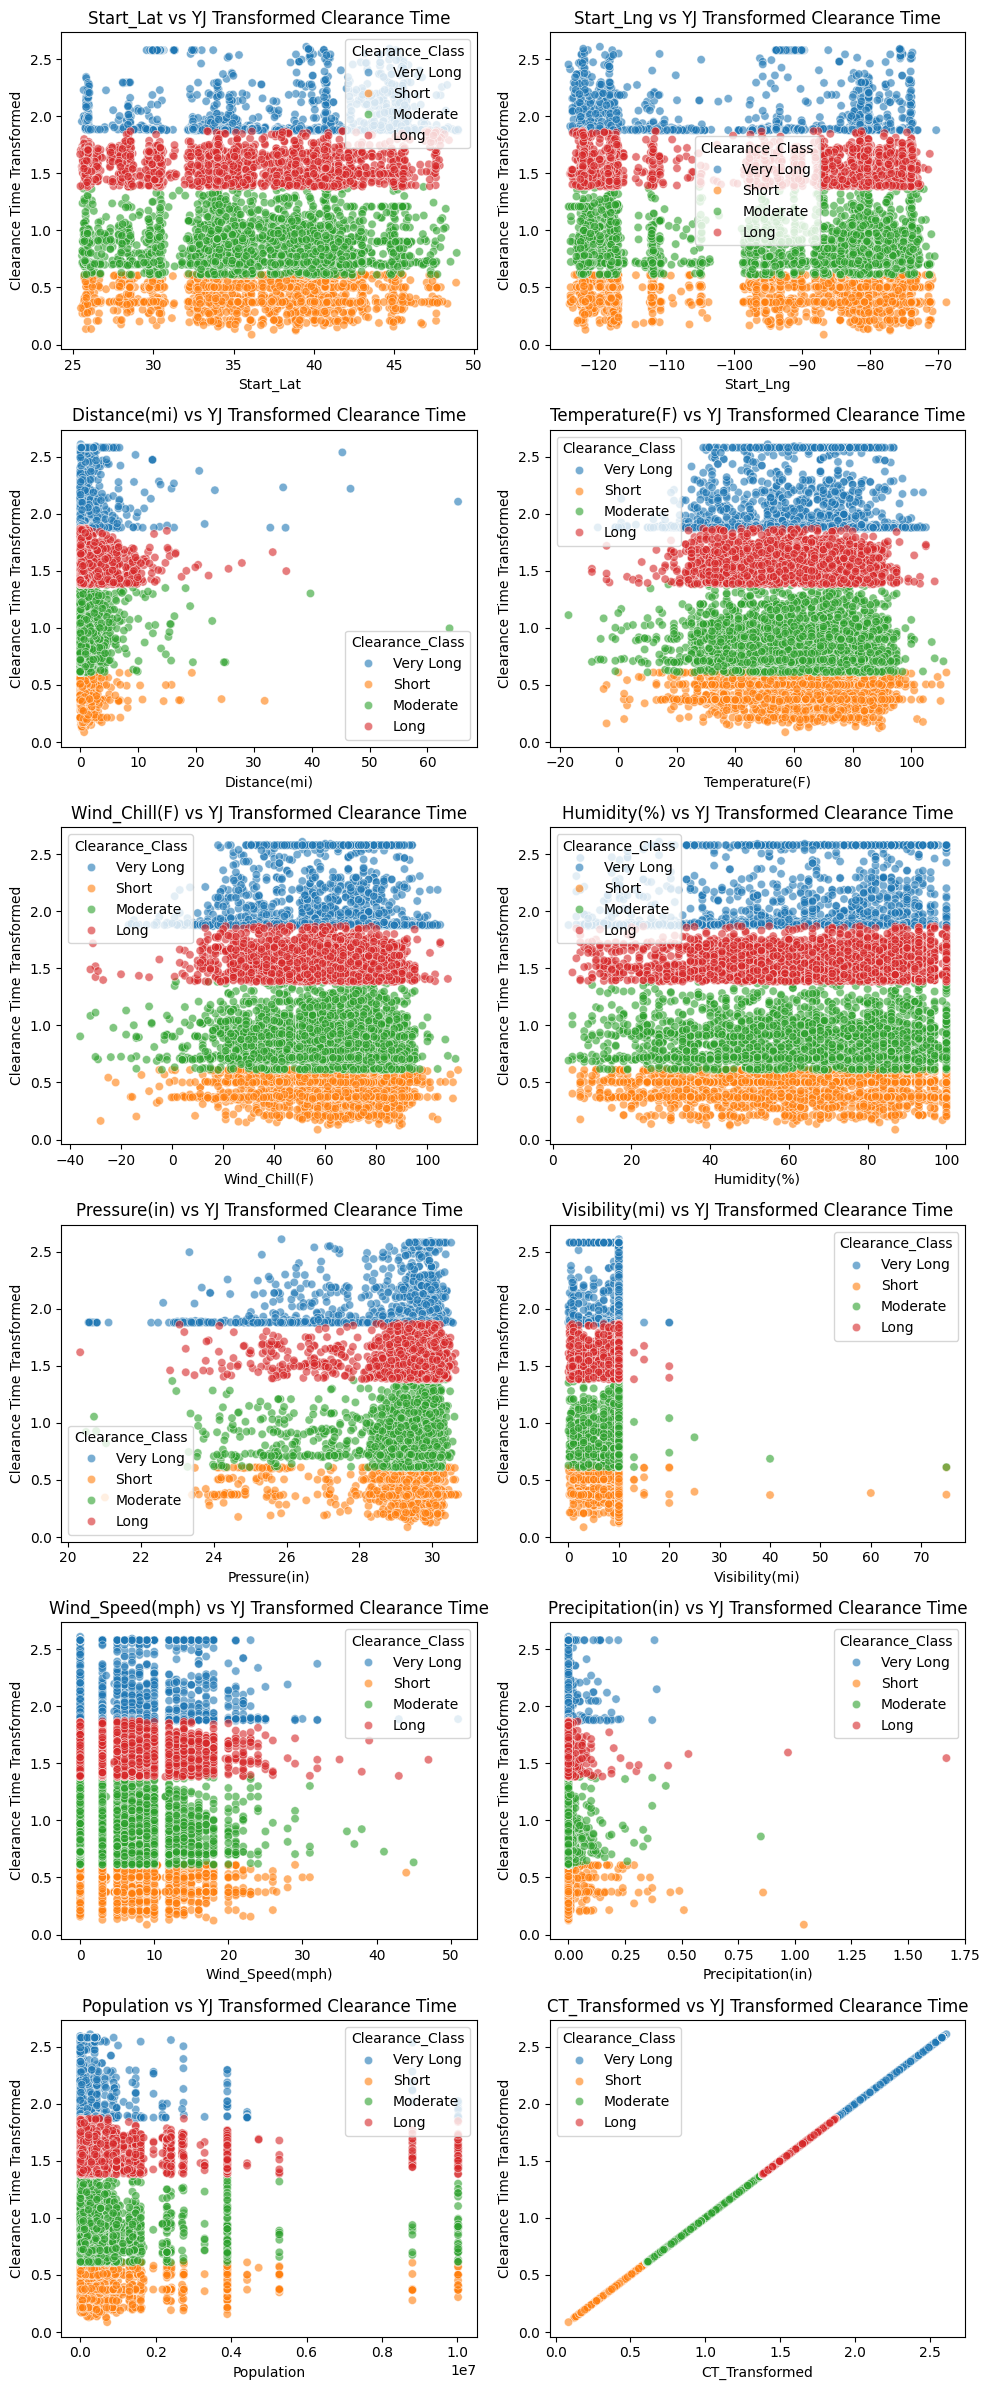

In [16]:
# Select numeric columns except the target
num_cols = [
    col for col in df.select_dtypes(include="number").columns 
    if col not in ["Clearance_Time(hr)", "Clearance_Time_Transformed"]
]
# Grid size
n = len(num_cols)
ncols = 2   # you can adjust (e.g., 2 or 4 depending on how many you have)
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()  # turn into 1D array for easy indexing

for idx, col in enumerate(num_cols):
    sns.scatterplot(
        x=col,
        y="CT_Transformed",
        data=df,
        hue="Clearance_Class",
        alpha=0.6,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{col} vs YJ Transformed Clearance Time")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Clearance Time Transformed")

# Hide unused subplots (if any)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

While these plots show that there are no straightforward, linear correlations between clearance times and each of these numerical variables, I can see that, when "Distance" > ~35 m, no clearances fall into the *Short* category. When "Visibility" > 20 m, clearances fall into the *Short* or *Moderate* category. When "Wind_Speed" > ~30 mph, clearances are very unlikely to be *Short*. Lastly, when "Population" > 0.4 x 10^7 (4 million) but < 0.8 x 10^7 (8 million), there are no *Very Long* clearances, but when "Population > 0.8 x 10^7 (8 million), clearance times appear less likely to be *Short* or *Very Long*. 

As whether population impacts clearance times is a central hypothesis, I will investigate this more closely. I am going to make a small DataFrame which will be used to construct a contingency table. I will divide "Population" into 4 quantile-based bins (same number of data points in each), "Low", "Medium, "High" and "Very High". 

In [31]:
df_pop = df[["Population", "Clearance_Class"]].copy()

df_pop["Pop_Category"] = pd.qcut(df_pop["Population"], q=4, labels=["Low", "Medium", "High", "Very High"])

contingency = pd.crosstab(df_pop["Pop_Category"], df_pop["Clearance_Class"])
print(contingency)

Clearance_Class  Long  Moderate  Short  Very Long
Pop_Category                                     
Low               592       672    590        638
Medium            554       659    624        654
High              701       629    622        584
Very High         802       687    815        137


I will plot the contingency table using a normalised, stacked bar chart so that I can compare between classes more easily, and then assess for statistical significance using the chi-squared test.

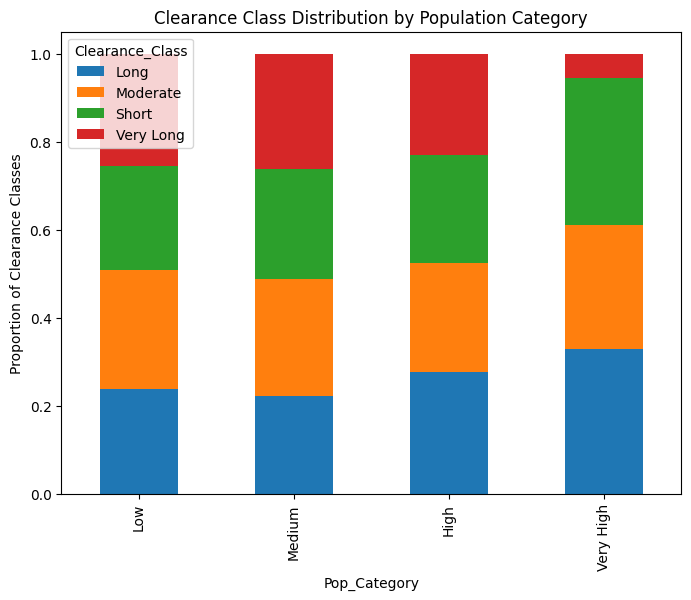

In [32]:
contingency_norm = contingency.div(contingency.sum(axis=1), axis=0)
contingency_norm.plot(kind='bar', stacked=True, figsize=(8,6))
plt.ylabel("Proportion of Clearance Classes")
plt.title("Clearance Class Distribution by Population Category")
plt.show()

In [33]:
expected, observed, stats = pg.chi2_independence(data=df_pop, x='Pop_Category', y='Clearance_Class')
stats[stats['test'] == 'pearson']

test  lambda        chi2  dof          pval    cramer  power
0  pearson     1.0  472.557152  9.0  4.298458e-96  0.125758    1.0

I can reject the null hypothesis and accept the alternate: there is a significant effect of "Population" on clearance time classes.

---

In [9]:
fig = px.box(
    df,
    x="County_Other",
    y="CT_Transformed",
    color="County_Other",
    animation_frame="State_Other",  # animate by state
    title="Clearance Time by County, grouped by State",
    points="all"  # optional: show individual data points
)

fig.update_layout(
    xaxis_title="County",
    yaxis_title="Clearance Time (hours)",
    showlegend=False,
    xaxis={'categoryorder':'total descending'},  # sort by count
    template="plotly_white",
    width=1000,
    height=600
)

fig.show()

---

## Correlation Matrix

First, I am going to change the data type of "Severity" back to integer.

In [ ]:
df["Severity"] = df["Severity"].astype("int")

I am using the library dython, which is able to make a correlation matrix with both numeric and categorical variables. A correlation matrix measures linear relationships between pairs of variables; it cannot capture non-linear relationships.

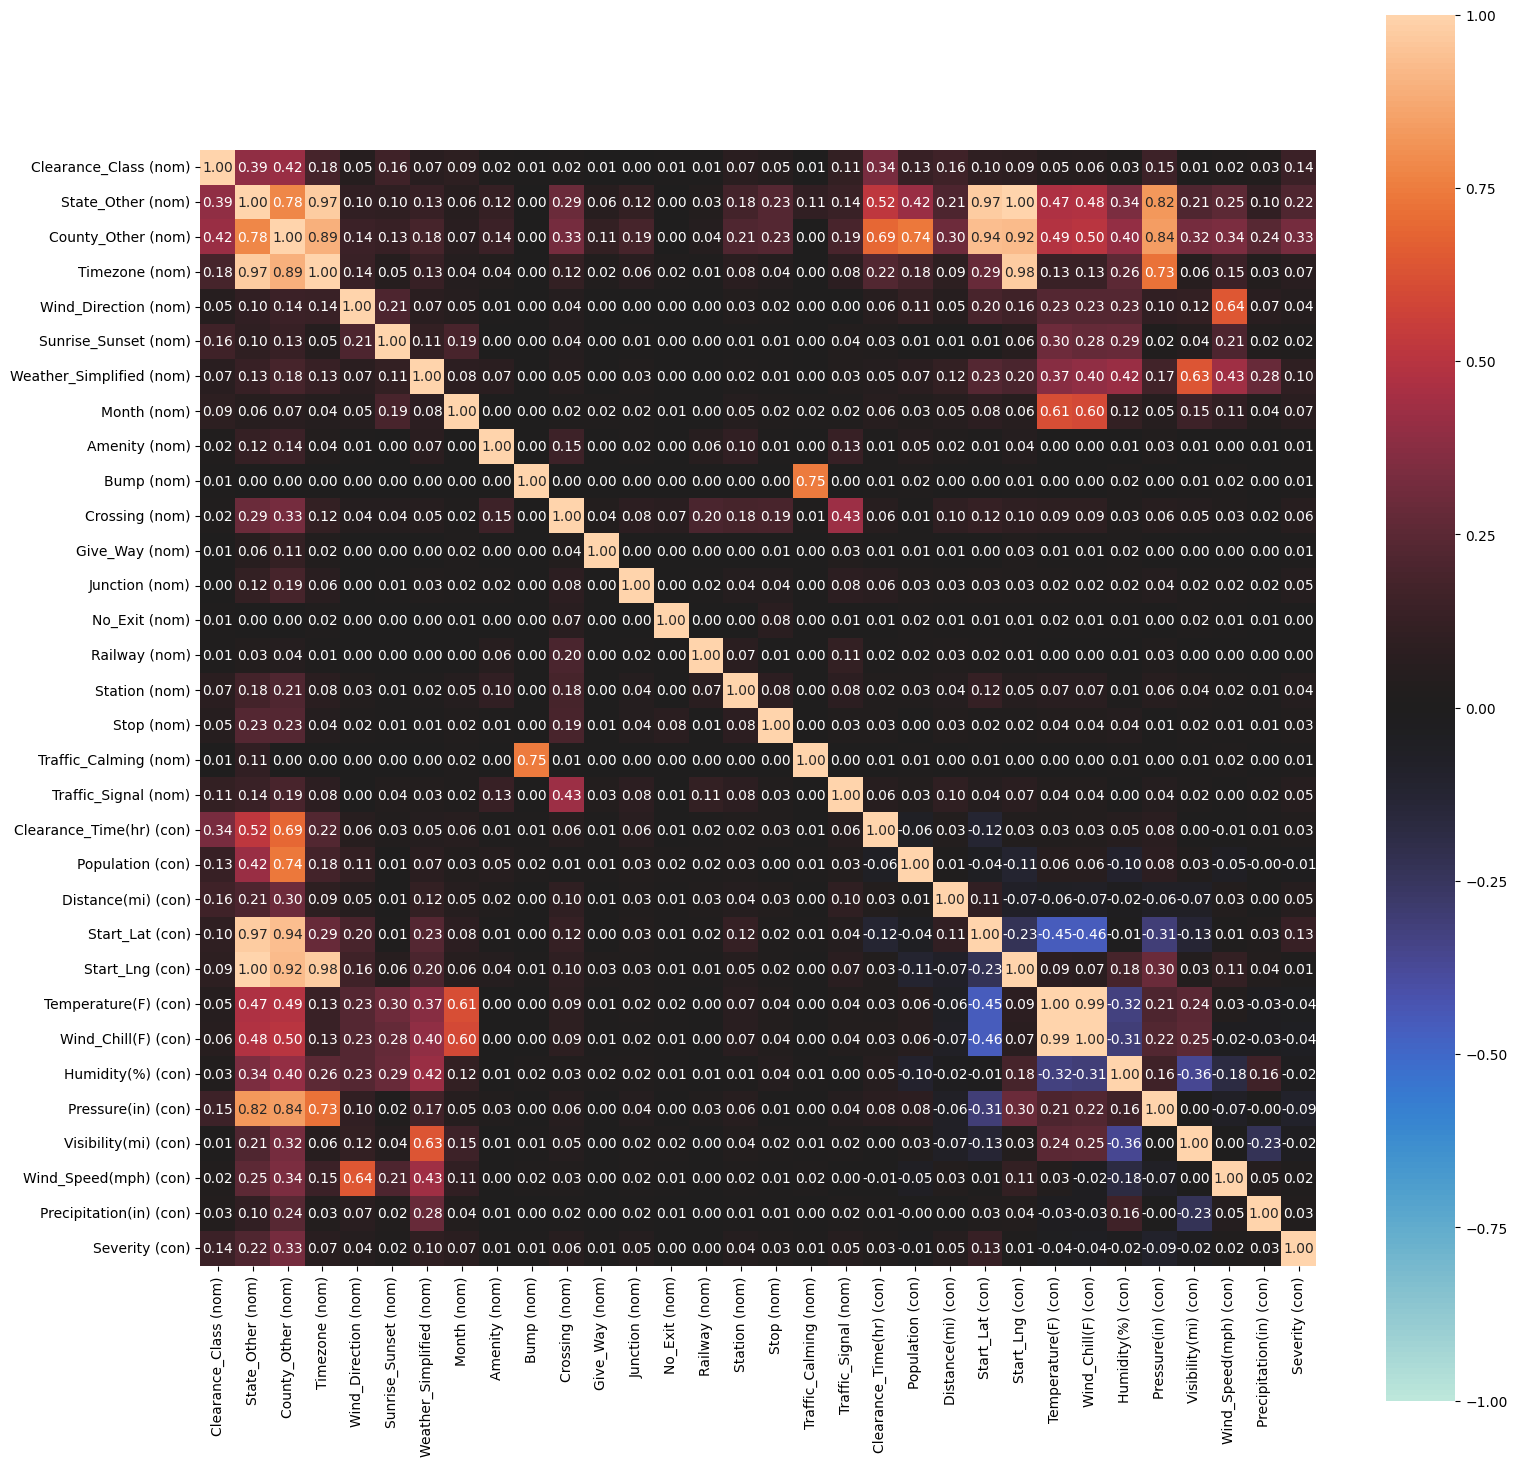

In [6]:
num_cols = ['Clearance_Time(hr)', 'Population', 'Distance(mi)', "Start_Lat", "Start_Lng", "Temperature(F)",
            "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", 
            "Precipitation(in)", "Severity"]
cat_cols = ["Clearance_Class", "State_Other", "County_Other", "Timezone", "Wind_Direction", "Sunrise_Sunset", 
            "Weather_Simplified", "Month", "Amenity", "Bump", "Crossing", "Give_Way", "Junction", 
            "No_Exit", "Railway", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]

df_mixed = df[cat_cols + num_cols]

# df_mixed contains numeric + categorical variables
assoc_matrix = associations(
    df_mixed,
    nominal_columns=cat_cols,  # specify which columns are categorical
    mark_columns=True,         # annotate the heatmap
    figsize=(18,18),
    plot=True
)

The matrix suggests that "County_Other" (0.42), "State_Other"(0.39), "Timezone" (0.18), "Sunrise_Sunset" (0.16), Distance(mi) (0.16), "Pressure(in) (0.15), "Severity" (0.14), "Population" (0.13) and "Traffic_Signal" (0.11) have the greatest linear correlation with "Clearance_Class. However, we can see that these correlations. apart from "County_Other" (0.42) and "State_Other"(0.39), are quite small.

Of interest, I note that "Clearance_Time(hr)" is more highly correlated to "County_Other" (0.69), "State_Other"(0.52) and "Timezome" (0.22), but isn't correlated (>0.10) with any other variables.

I also see expected strong correlations between groups of variables related to location and weather condition, and I note the extremely strong correlation between "Temperature(F)" and "Wind_Chill(F)" at 0.99. I am going to plot "Temperature(F)" vs "Wind_Chill(F)" on a scatter to chart to investigate.

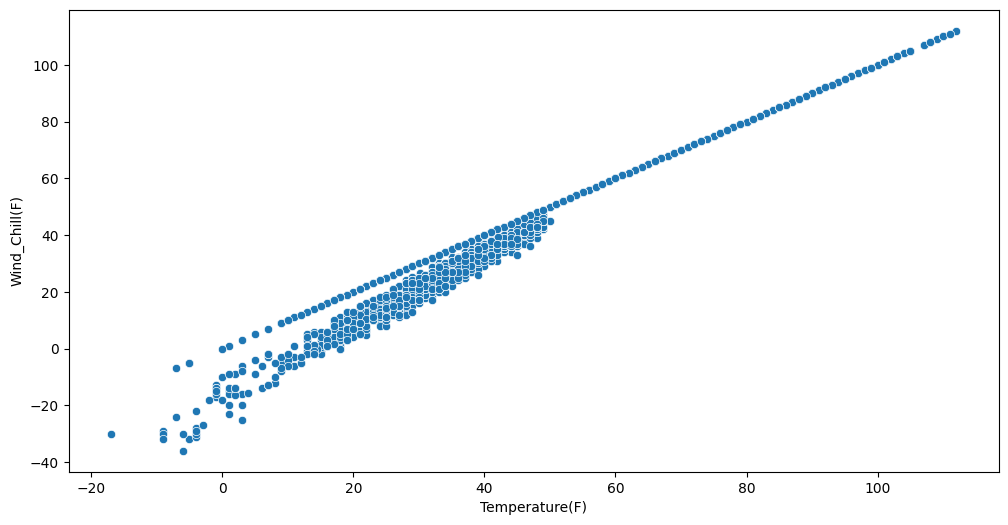

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df, x="Temperature(F)", y="Wind_Chill(F)")
plt.show()

This chart clearly shows the tight relationship between "Temperature(F)" vs "Wind_Chill(F)". I will drop the variable "Wind_Chill(F)" from further analysis.

---

## Save to CSV File

As above, I am not carrying forward "Wind_Chill(F)", and I will not be carrying forward "Clearance_Time(hr), as it is analogous to the target "Clearance_Class". 

In [7]:
keep_col = [
    "Severity",
    "Start_Lat",
    "Start_Lng",
    "Distance(mi)",
    "Timezone",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Direction",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Sunrise_Sunset",
    "Clearance_Class",
    "Weather_Simplified",
    "State_Other",
    "Population",
    "County_Other",
    "Month"
]

df_keep = df[keep_col]
df_keep.head()

Severity  Start_Lat  Start_Lng  Distance(mi) Timezone  Temperature(F)  \
0         2  32.456486 -93.774536         0.501  Central            78.0   
1         2  36.804693 -76.189728         0.253  Eastern            54.0   
2         2  29.895741 -90.090026         1.154  Pacific            40.0   
3         2  32.456459 -93.779709         0.016  Central            62.0   
4         2  26.966433 -82.255414         0.057  Eastern            84.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         62.0         29.61            10.0           CALM              0.0   
1         90.0         30.40             7.0           CALM              0.0   
2         58.0         30.28            10.0              N             10.0   
3         75.0         29.80            10.0            SSE              8.0   
4         69.0         29.99            10.0              E             18.0   

   Precipitation(in)  Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  \
0                0.0    False  False     False     False     False    False   
1                0.0    False  False      True     False     False    False   
2                0.0    False  False     False     False      True    False   
3                0.0    False  False     False     False     False    False   
4                0.0    False  False     False     False     False    False   

   Railway  Station   Stop  Traffic_Calming  Traffic_Signal Sunrise_Sunset  \
0    False    False  False            False           False          Night   
1    False    False  False            False            True          Night   
2    False    False  False            False           False            Day   
3    False    False  False            False           False          Night   
4    False    False  False            False           False            Day   

  Clearance_Class Weather_Simplified State_Other  Population    County_Other  \
0       Very Long               Fair          LA      187540           Caddo   
1       Very Long               Fair          VA      459444  Virginia Beach   
2       Very Long             Cloudy          LA      440784       Jefferson   
3       Very Long             Cloudy          LA      187540           Caddo   
4       Very Long             Cloudy          FL      186824           Other   

  Month  
0   Sep  
1   May  
2   Jan  
3   Nov  
4   Sep

I will have a look at the shape.

In [8]:
df_keep.shape

(9960, 30)

Finally, save to csv file for use in the notebooks Number_Feature_Transformations.

In [9]:
df_keep.to_csv("Data/ML/US_Accidents_For_ML.csv", index=False)

---

## Conclusion and Next Steps

* The variables "County_Other" and "State_Other" show both the most statistically significant differences in "Clearance_Class" distributions and the strongest linear correlation, suggesting that these will be important for the end model
* The correlation matrix shows linear relationships which are more likely to be important for logistic regression algorithms which model linaer relationships
* The generally low level of linear relationships found in this dataset suggests a tree based algorithm may perform best overall 
* Both logistic regression and artifical neural network based algorithms are likely to perform better on transformed data that are closer to a normal distribution. As some of my numeric variables are extremely skewed, my next step is to investigate which transformers work best on which variables, in the notebook "Number_Feature_Transformations"